In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('enjoy_inc_glassdoor_reviews.csv',encoding = 'unicode_escape');

In [3]:
data.head()

,Unnamed: 0,date,employeeType,position,work_location,Location,summary,pro,con,overallStar,workLifeStar,cultureStar,careerOppStar,comBenefitsStar,srManagementStar,reviewLink
0,1,25-Apr-21,Current Employee,Enjoy Expert,"Dallas, TX",MW,"""Great Start up""","Culture, Management, Meet new people every day...",Advancement only if relocate and Pay is below ...,4,3,5,2,3,4,https://www.glassdoor.co.in/Reviews/Enjoy-Tech...
1,2,25-Apr-21,Former Employee,Mobile Expert,None,NaN,"""A genuine disappointment.""","4 Day week might be good for some, but shift b...","Weak onboarding & orientation process, a lot o...",1,2,1,1,1,1,https://www.glassdoor.co.in/Reviews/Enjoy-Tech...
2,3,21-Feb-21,Former Employee,Mobile Field Expert,"Philadelphia, PA",E,"""Don't get it twisted, this is a sales role""","I enjoyed helping people learn new skills, to ...",Latest technologies... became telecommunicatio...,3,3,4,3,3,4,https://www.glassdoor.co.in/Reviews/Enjoy-Tech...
3,4,7-Apr-21,Current Employee,Field Technician,"Cambridge, East of England, England, England",UK,"""Itâs in the name!""",Enjoy! \r\nLiterally is the best company I AM ...,There is always room for improvement but as a ...,5,5,5,5,5,5,https://www.glassdoor.co.in/Reviews/Enjoy-Tech...
4,5,26-Apr-21,Former Employee,Mobile Expert,"Alexandria, VA",E,"""It was alright""","Great company ethics, Full 40 hours on your ch...","like all sales, there's a lot of goals and exp...",4,5,4,3,5,4,https://www.glassdoor.co.in/Reviews/Enjoy-Tech...


In [4]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title,fontsize=40, color='green')

In [5]:
pros_data= data

In [6]:
#Calculating the Sentiment Polarity
pros_polarity=[] # list which will contain the polarity of the comments
pros_subjectivity=[] # list which will contain the subjectivity of the comments
for i in pros_data['pro'].values:
    try:
        analysis =TextBlob(i)
        pros_polarity.append(analysis.sentiment.polarity)
        pros_subjectivity.append(analysis.sentiment.subjectivity)
    except:
        pros_polarity.append(0)
        pros_subjectivity.append(0)

In [7]:
#Adding the Sentiment Polarity column to the data
pros_data['pros_polarity']=pros_polarity
pros_data['pros_subjectivity']=pros_subjectivity

# Overall positive review

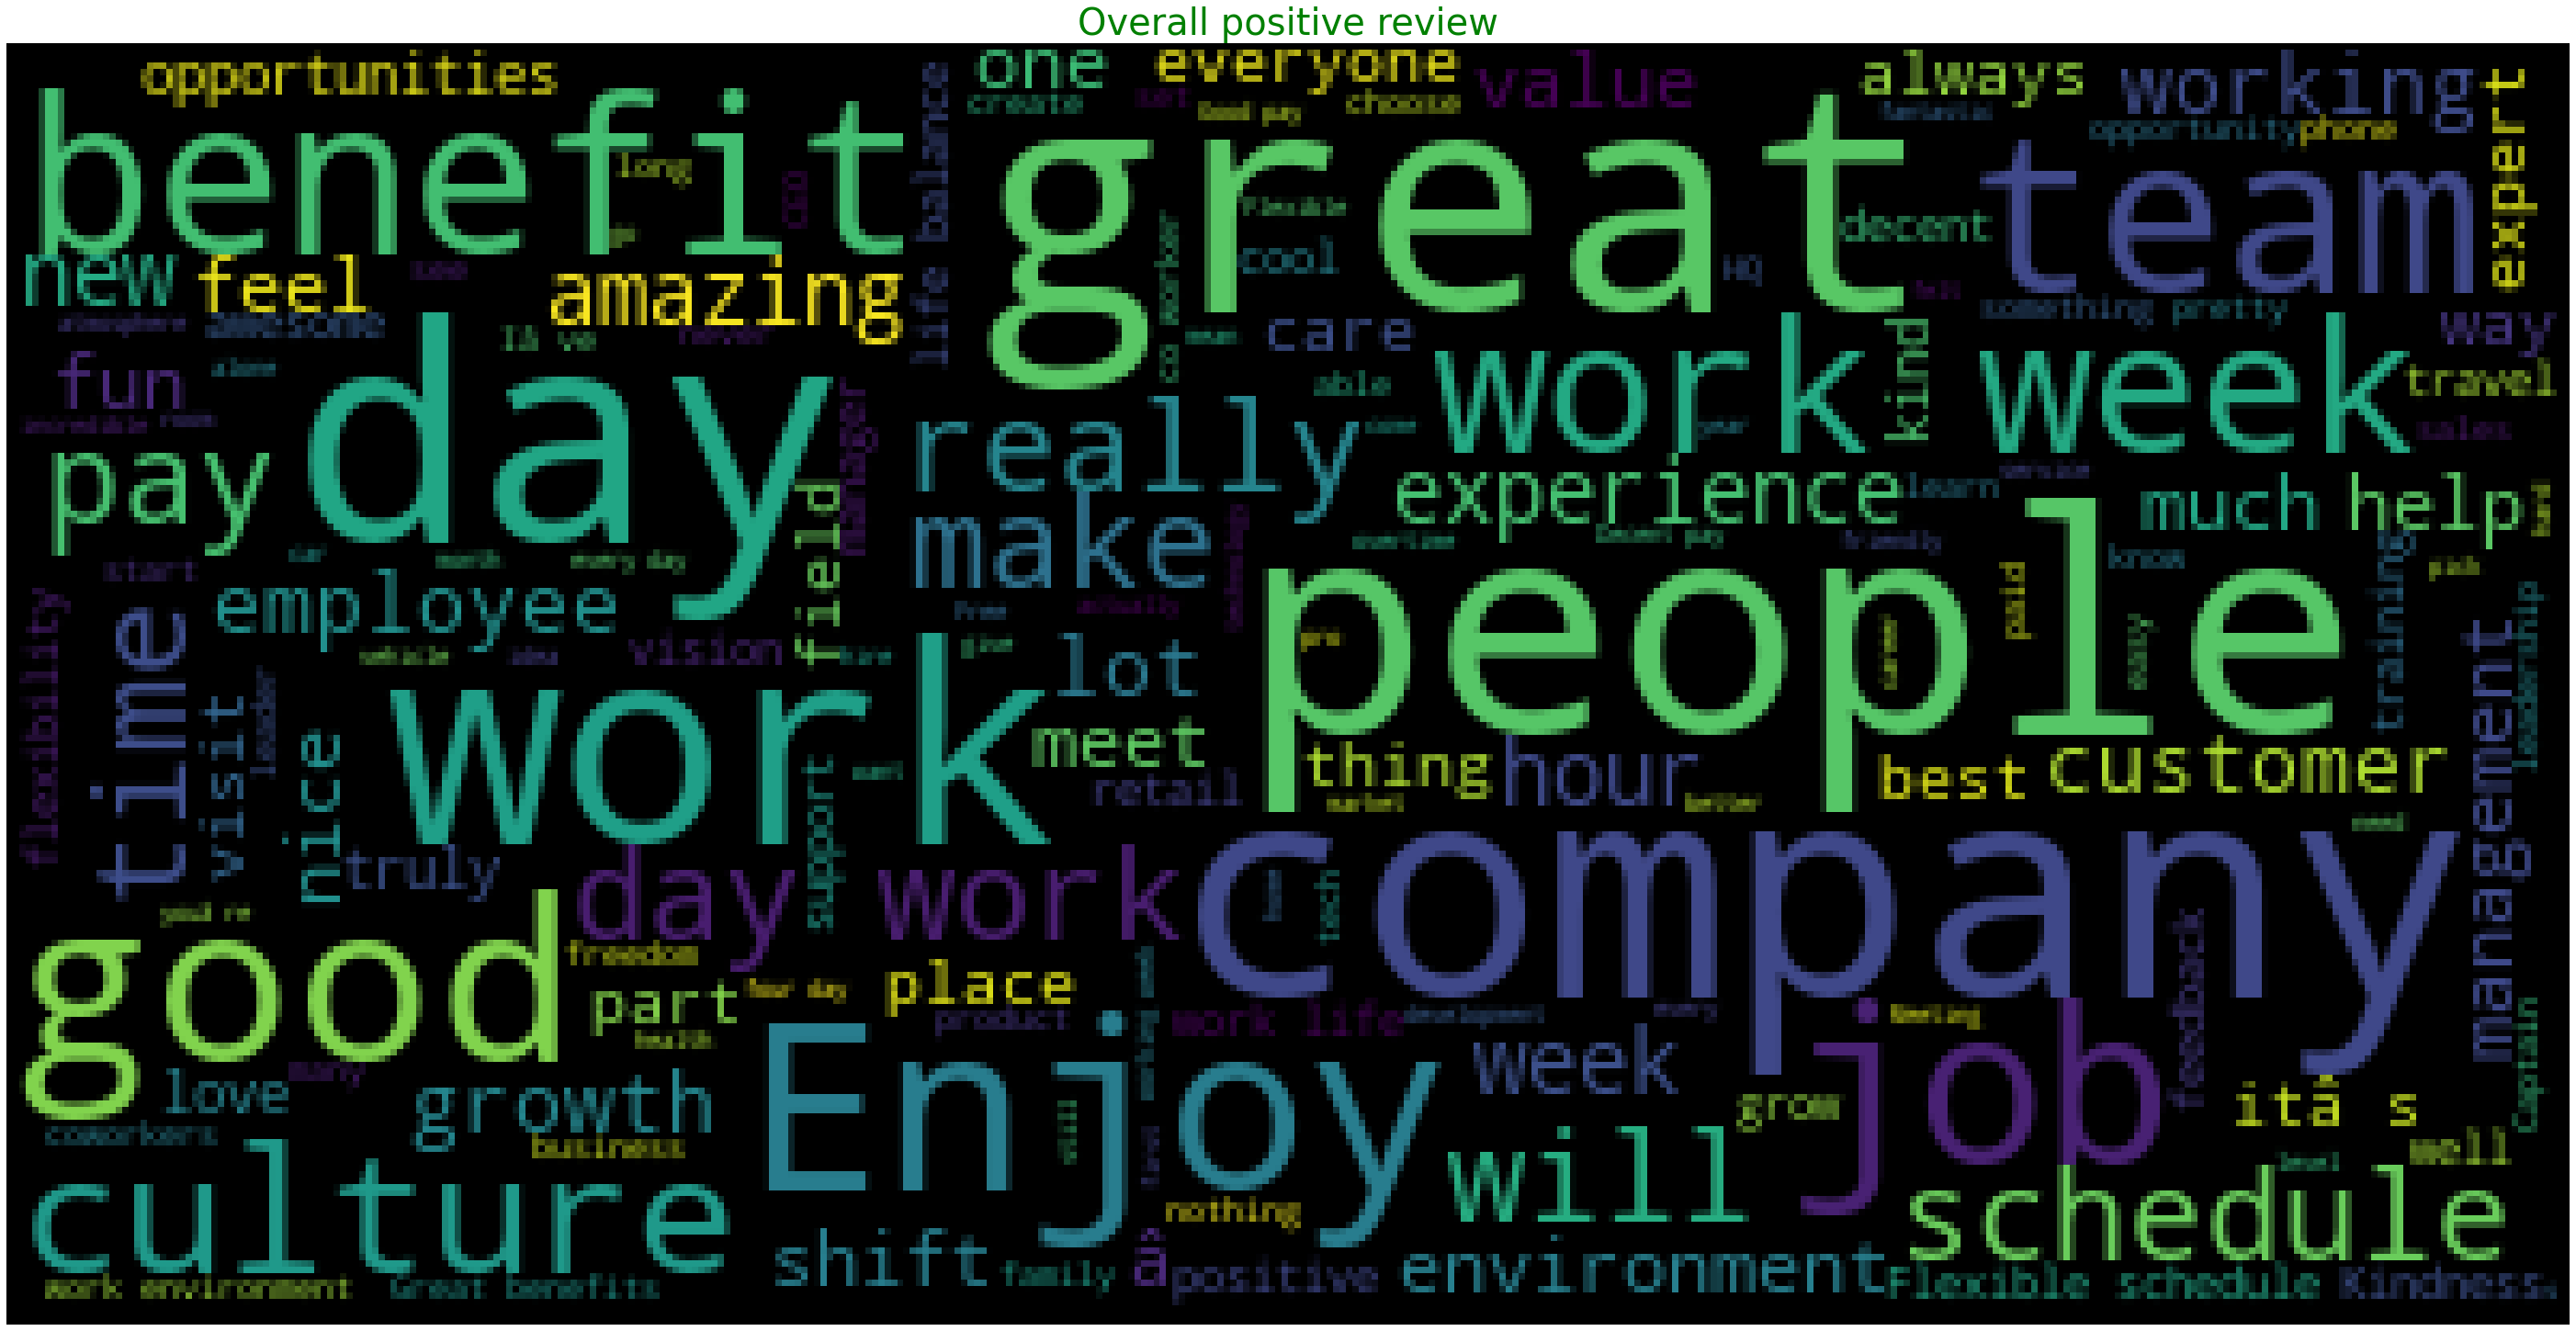

In [8]:
wc(pros_data['pro'],'black','Overall positive review' )

In [9]:
pros_data[['summary','pro','pros_polarity','pros_subjectivity']].head(10)

,summary,pro,pros_polarity,pros_subjectivity
0,"""Great Start up""","Culture, Management, Meet new people every day...",0.136364,0.454545
1,"""A genuine disappointment.""","4 Day week might be good for some, but shift b...",0.700000,0.600000
2,"""Don't get it twisted, this is a sales role""","I enjoyed helping people learn new skills, to ...",0.413447,0.589962
3,"""Itâs in the name!""",Enjoy! \r\nLiterally is the best company I AM ...,0.400833,0.507778
4,"""It was alright""","Great company ethics, Full 40 hours on your ch...",0.416667,0.533333
5,"""CEO asleep at the wheel. Please wake up!""",Has so much potential but is being squandered ...,0.086580,0.645671
6,"""Amazing""",Great starting salary \r\n4 Days a week with p...,0.533333,0.533333
7,"""AVOID AT ALL COSTS! DO NOT WORK HERE!""","Started off as a decent business, changed into...",-0.062500,0.604167
8,"""HQ Culture - Toxic, Manipulative, and Misogyn...",- If you have a great boss who is a leader you...,0.328571,0.548214
9,"""Ok but very sales oriented now which isn't ho...",Great pay\r\nCompany vehicle\r\nGood team\r\nP...,0.750000,0.675000


# Displaying highly positive reviews

In [10]:
#Displaying highly positive reviews
pros_data[['summary','pro','pros_polarity','pros_subjectivity']][pros_data.pros_polarity>0.7].head(10)

,summary,pro,pros_polarity,pros_subjectivity
9,"""Ok but very sales oriented now which isn't ho...",Great pay\r\nCompany vehicle\r\nGood team\r\nP...,0.75,0.675
22,"""Great place to learn what you can handle.""",There will be room to grow. Great people work ...,0.80,0.750
23,"""Great company""",Great place to work - good environment,0.75,0.675
47,"""Driving Sales Start-up""",Great in the beginning\r\nOvertime availability,0.80,0.750
86,"""Great place for sales rookies""","Great leadership, benefits, and opportunity fo...",0.80,0.750
92,"""Company is still molding and finding itâs way""",Good pay\r\nGreat opportunity for people with ...,0.70,0.750
96,"""Great future""",Great opportunities to advance in this company...,0.80,0.750
97,"""Ok company""",Great company benefits and great pay,0.80,0.750
109,"""Great""",Great support\r\nMeeting lots of people,0.80,0.750
111,"""N/A""",Great experience and great work place.,0.80,0.750


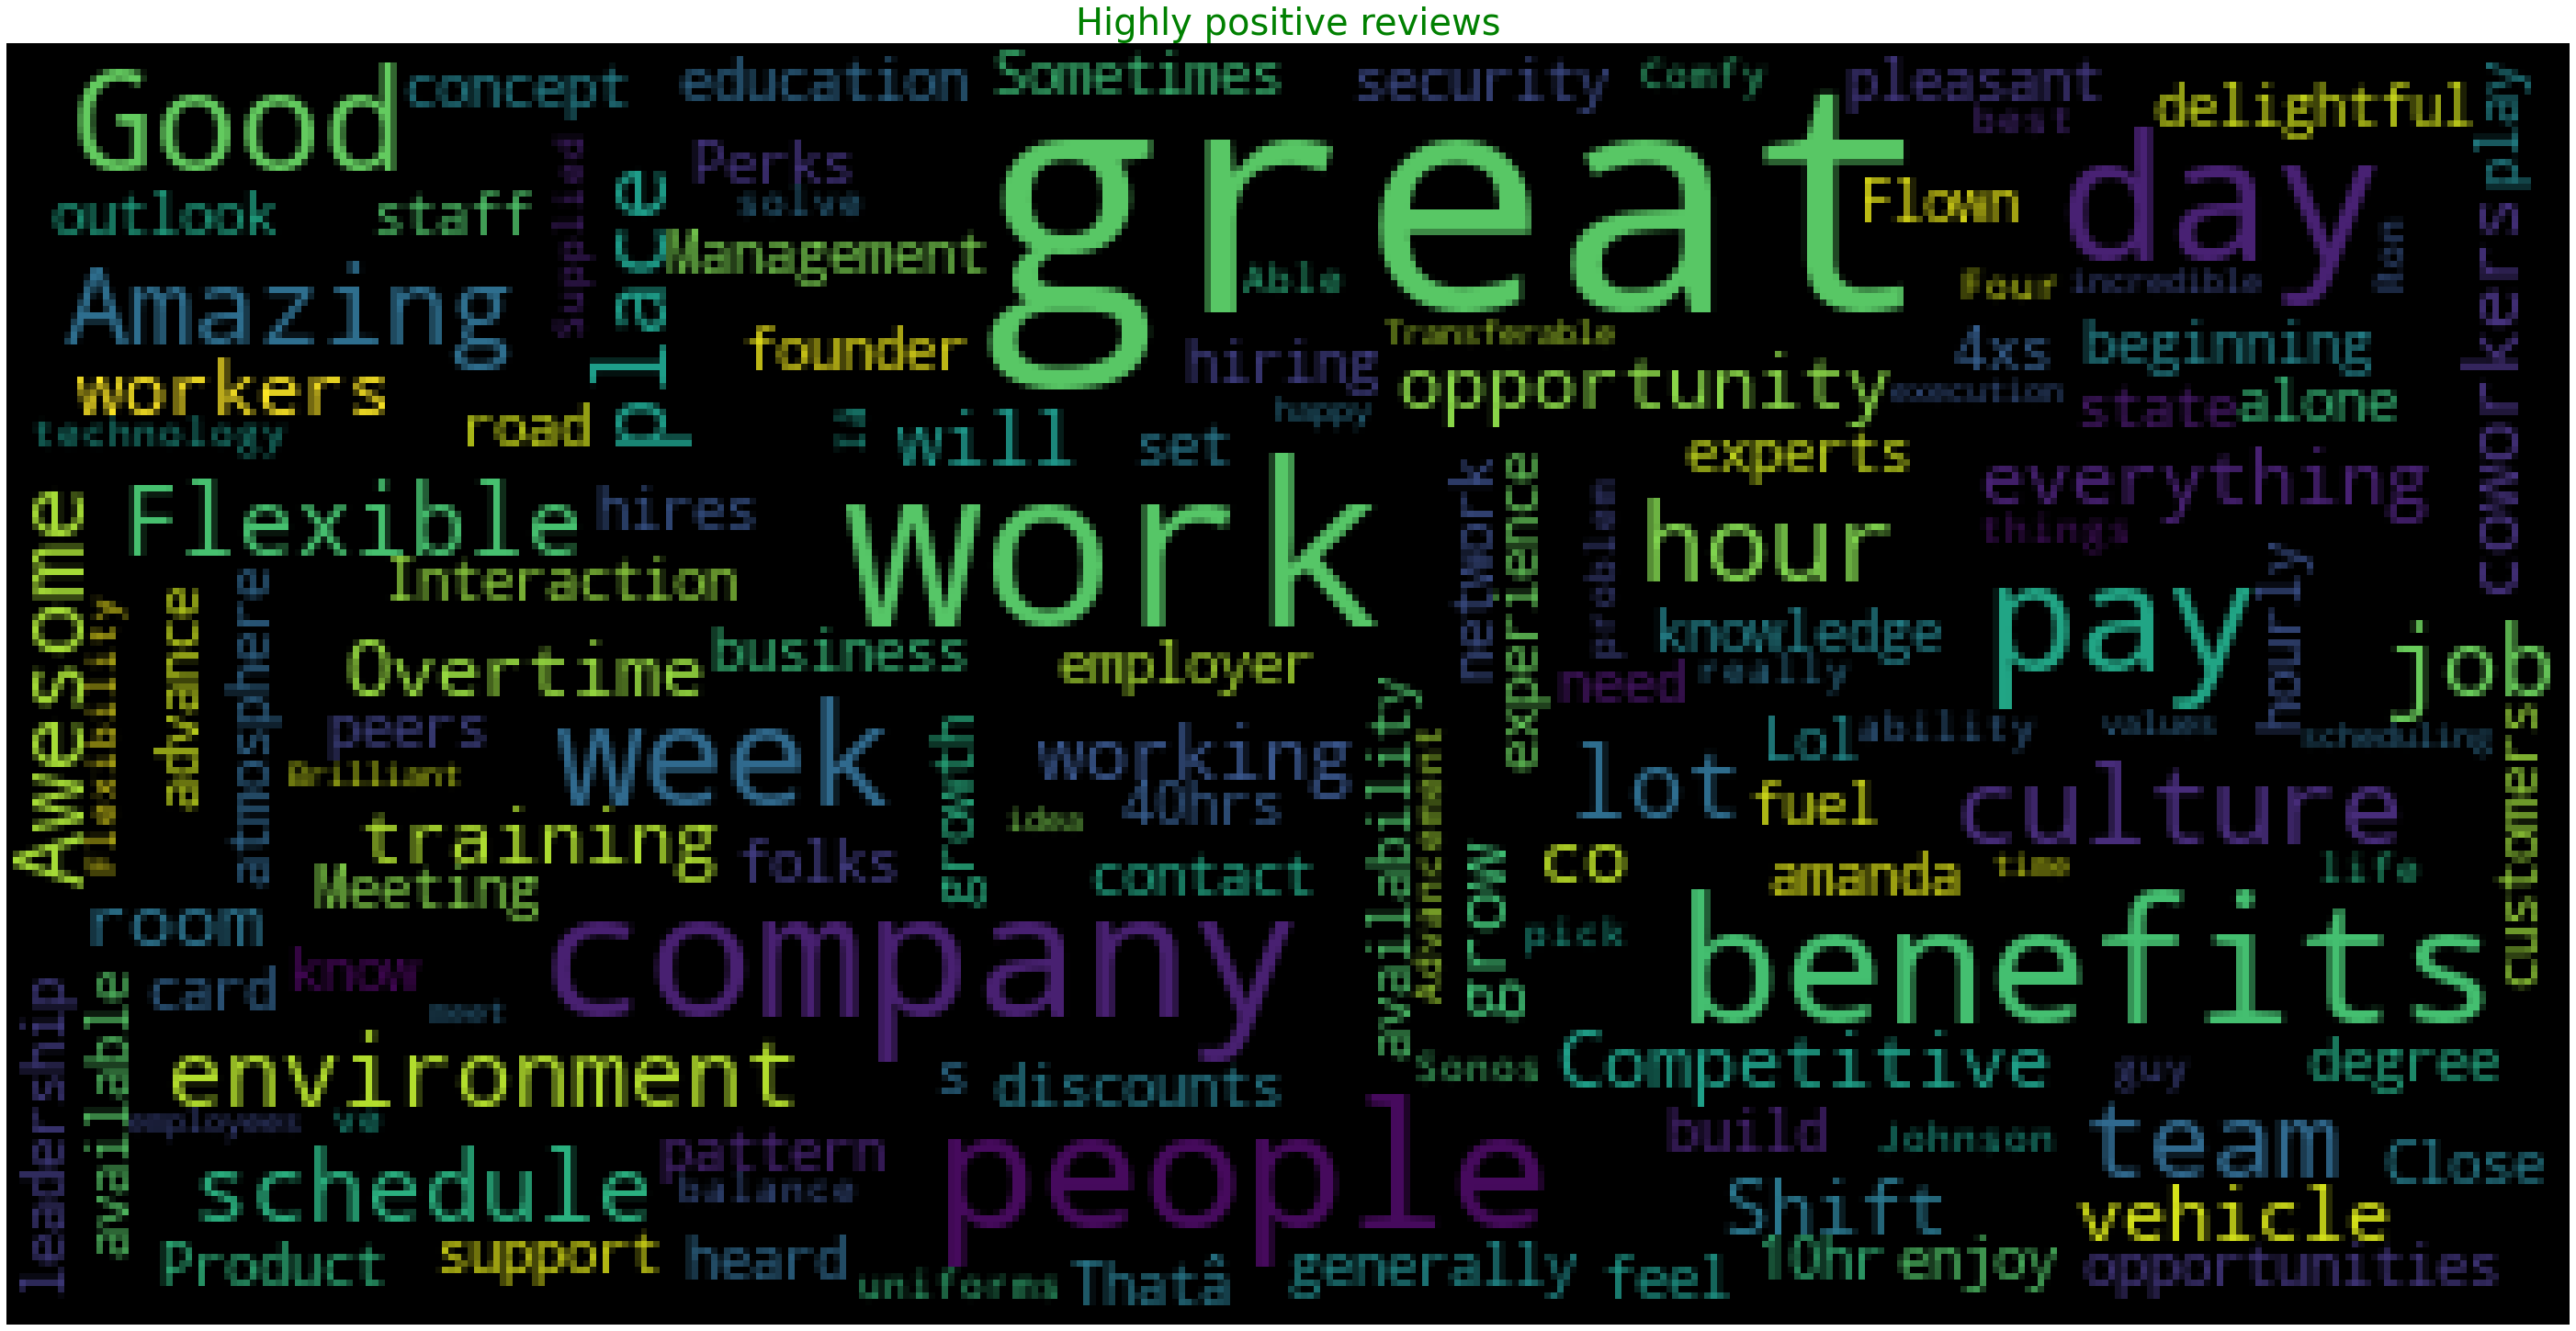

In [11]:
wc(pros_data['pro'][pros_data.pros_polarity>0.7],'black','Highly positive reviews' )

In [12]:
cons_data = data

In [13]:
#Calculating the Sentiment Polarity
cons_polarity=[] # list which will contain the polarity of the comments
cons_subjectivity=[] # list which will contain the subjectivity of the comments
for i in cons_data['con'].values:
    try:
        analysis =TextBlob(i)
        cons_polarity.append(analysis.sentiment.polarity)
        cons_subjectivity.append(analysis.sentiment.subjectivity)
    except:
        cons_polarity.append(0)
        cons_subjectivity.append(0)

In [14]:
#Adding the Sentiment Polarity column to the data
cons_data['cons_polarity']=cons_polarity
cons_data['cons_subjectivity']=cons_subjectivity

In [15]:
cons_data['con']

0      Advancement only if relocate and Pay is below ...
1      Weak onboarding & orientation process, a lot o...
2      Latest technologies... became telecommunicatio...
3      There is always room for improvement but as a ...
4      like all sales, there's a lot of goals and exp...
                             ...                        
433                              Not much I can think of
434          Start up constantly changing gets to be old
435    No real con. Standard warehouse fulfillment du...
436    It's a start up, so it's a work in progress. M...
437    Poor salary, 401K and vest options for managem...
Name: con, Length: 438, dtype: object

# Overall negative reviews

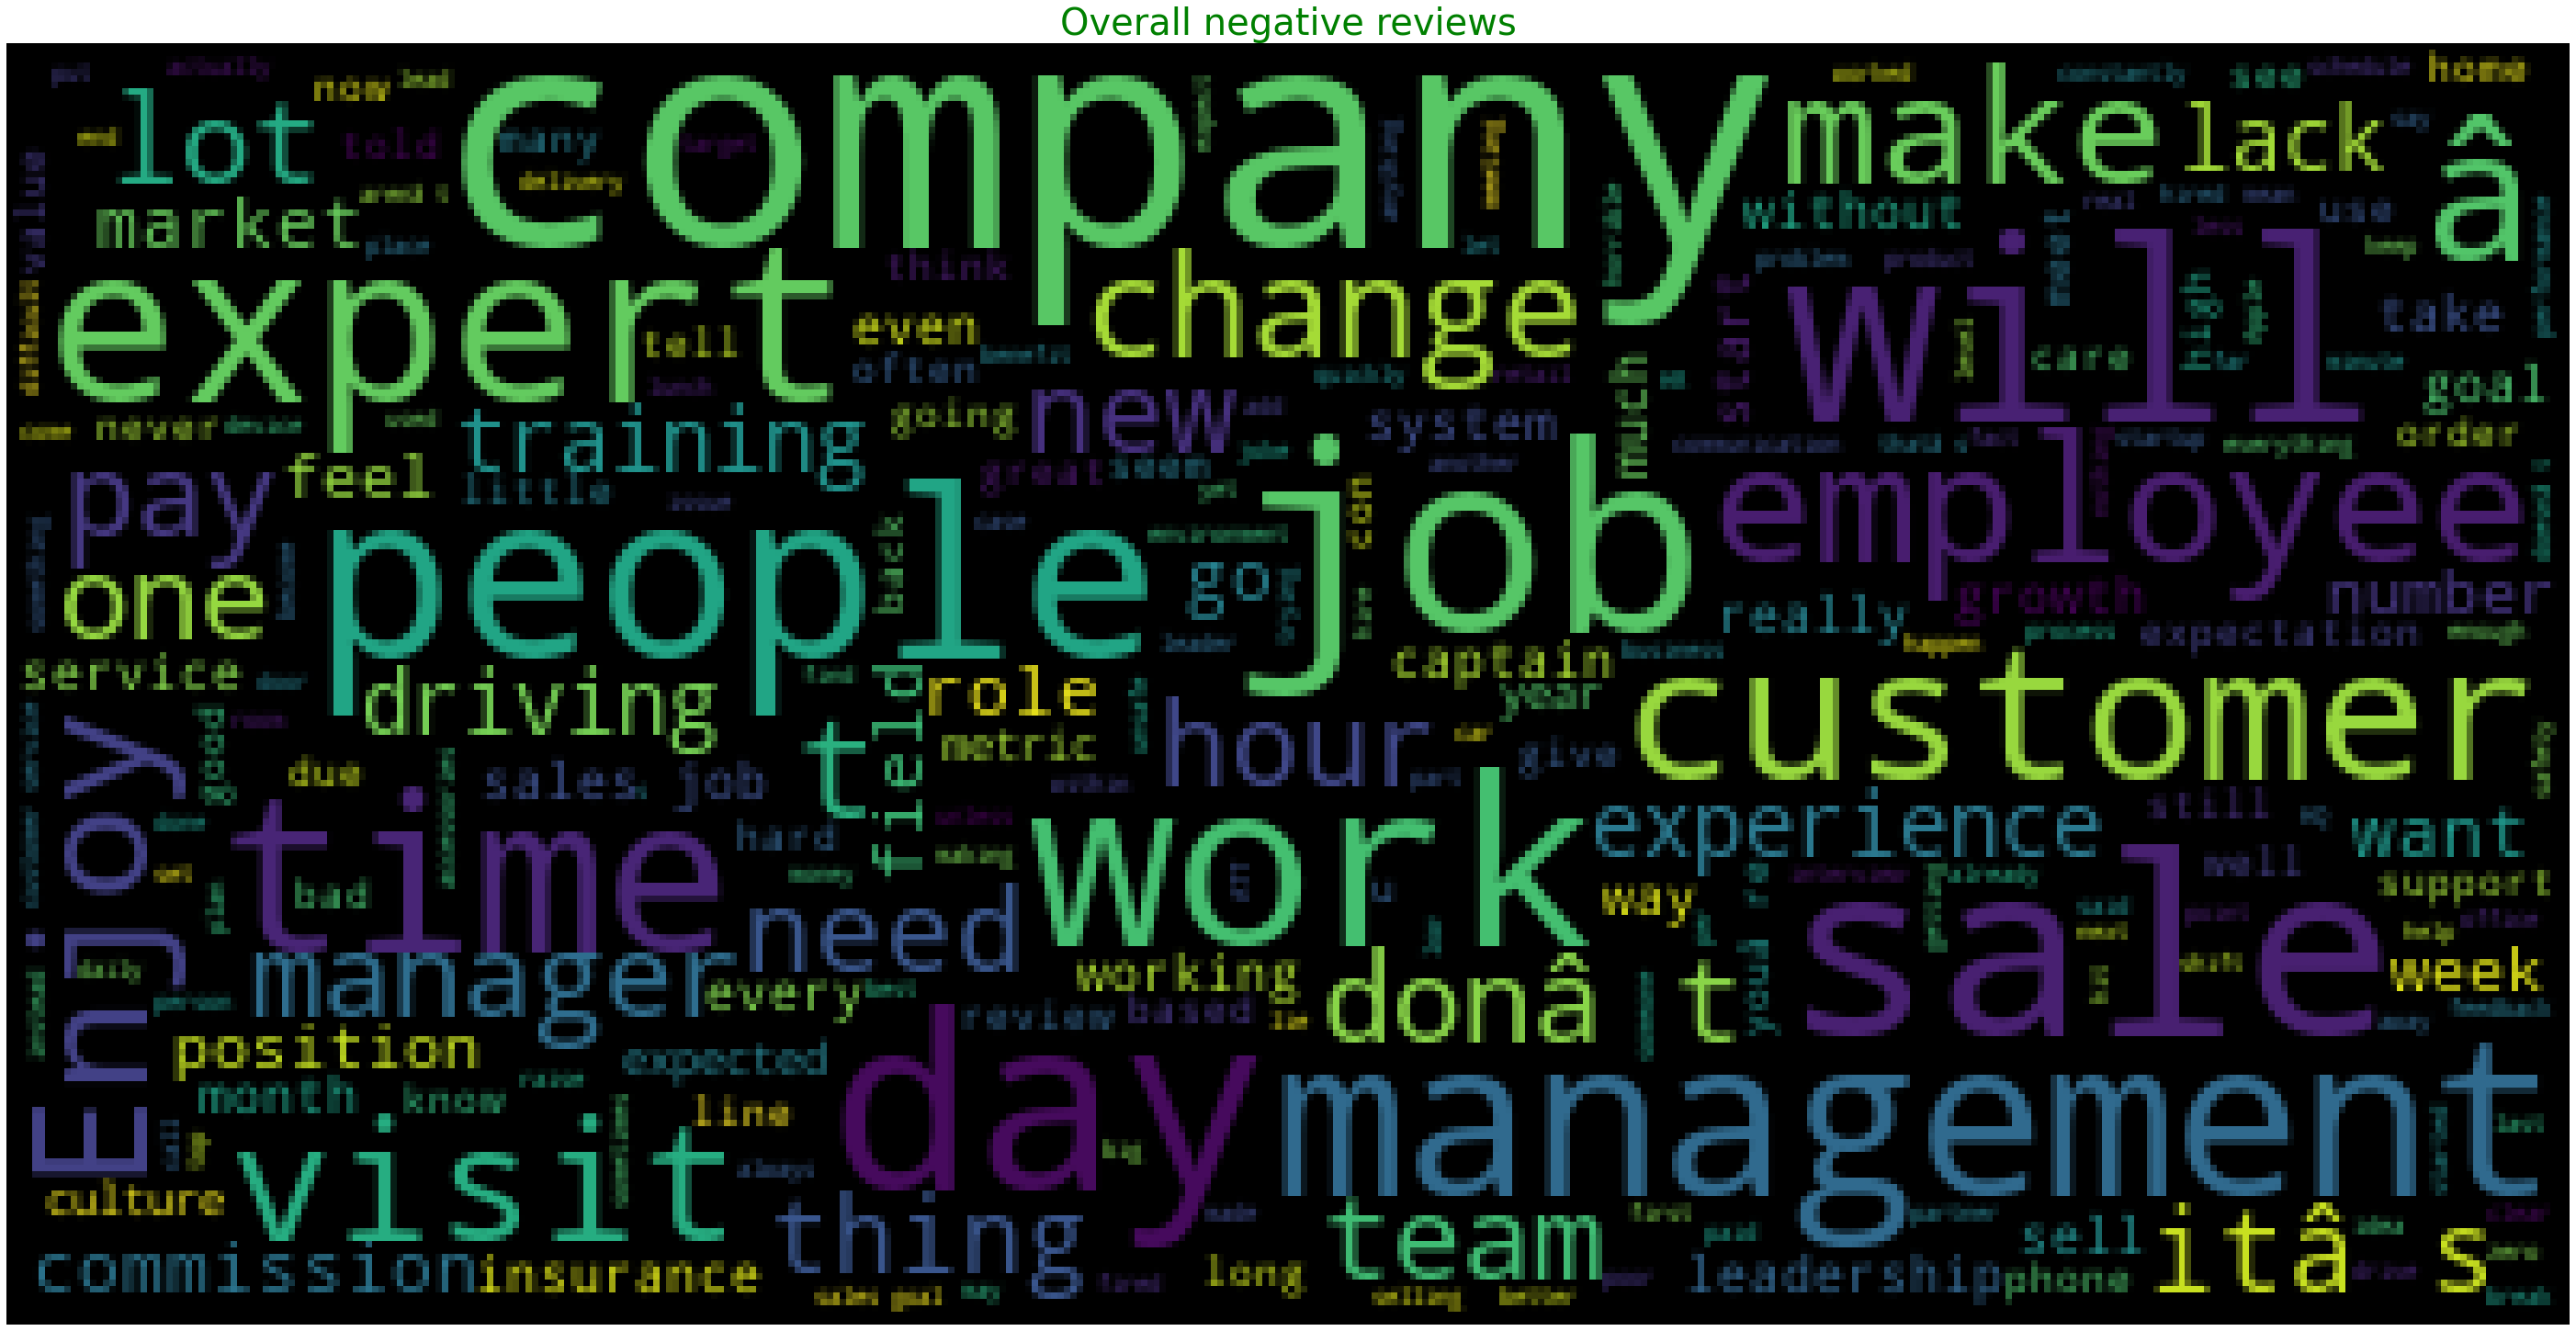

In [16]:
wc(cons_data['con'],'black','Overall negative reviews' )

# Displaying highly negative reviews

In [17]:
cons_data= data

In [18]:
#Calculating the Sentiment Polarity
cons_polarity=[] # list which will contain the polarity of the comments
cons_subjectivity=[] # list which will contain the subjectivity of the comments
for i in cons_data['con'].values:
    try:
        analysis =TextBlob(i)
        cons_polarity.append(analysis.sentiment.polarity)
        cons_subjectivity.append(analysis.sentiment.subjectivity)
    except:
        cons_polarity.append(0)
        cons_subjectivity.append(0)

In [19]:
#Adding the Sentiment Polarity column to the data
cons_data['cons_polarity']=cons_polarity
cons_data['cons_subjectivity']=cons_subjectivity

In [20]:
#Displaying highly negative reviews
cons_data[['summary','con','cons_polarity','cons_subjectivity']][cons_data.cons_polarity<-0.4].head(10)

,summary,con,cons_polarity,cons_subjectivity
9,"""Ok but very sales oriented now which isn't ho...",Long hours\r\nVery bad management (Captains),-0.480000,0.633333
65,"""Can be stressful""",Unrealistic targets are set for the team,-0.500000,1.000000
75,"""Beware!""",There is A LOT of micromanaging. The expectati...,-0.420833,0.925000
81,"""Field expert""",Management were horrible\nForced us to sell an...,-0.650000,0.600000
85,"""Solid bottom line. A trying curve.""",30 min lunch breaks\r\nTime crunched work hour...,-0.500000,1.000000
93,"""It was good at first""",Terrible management no advancement alot of dri...,-1.000000,1.000000
98,"""Great Company""",Difficult sales goals to maintain,-0.500000,1.000000
129,"""Okay company""","Scheduling is awful, high pressure sales envir...",-0.420000,0.770000
151,"""Can't believe this company is still around""",This job is dangerous and they don't care abou...,-0.600000,0.900000
156,"""False advertising everywhere in this company""",The pay\r\nThe benefits \r\nTheir mobile app\r...,-0.566667,0.888889


# Highly negative reviews

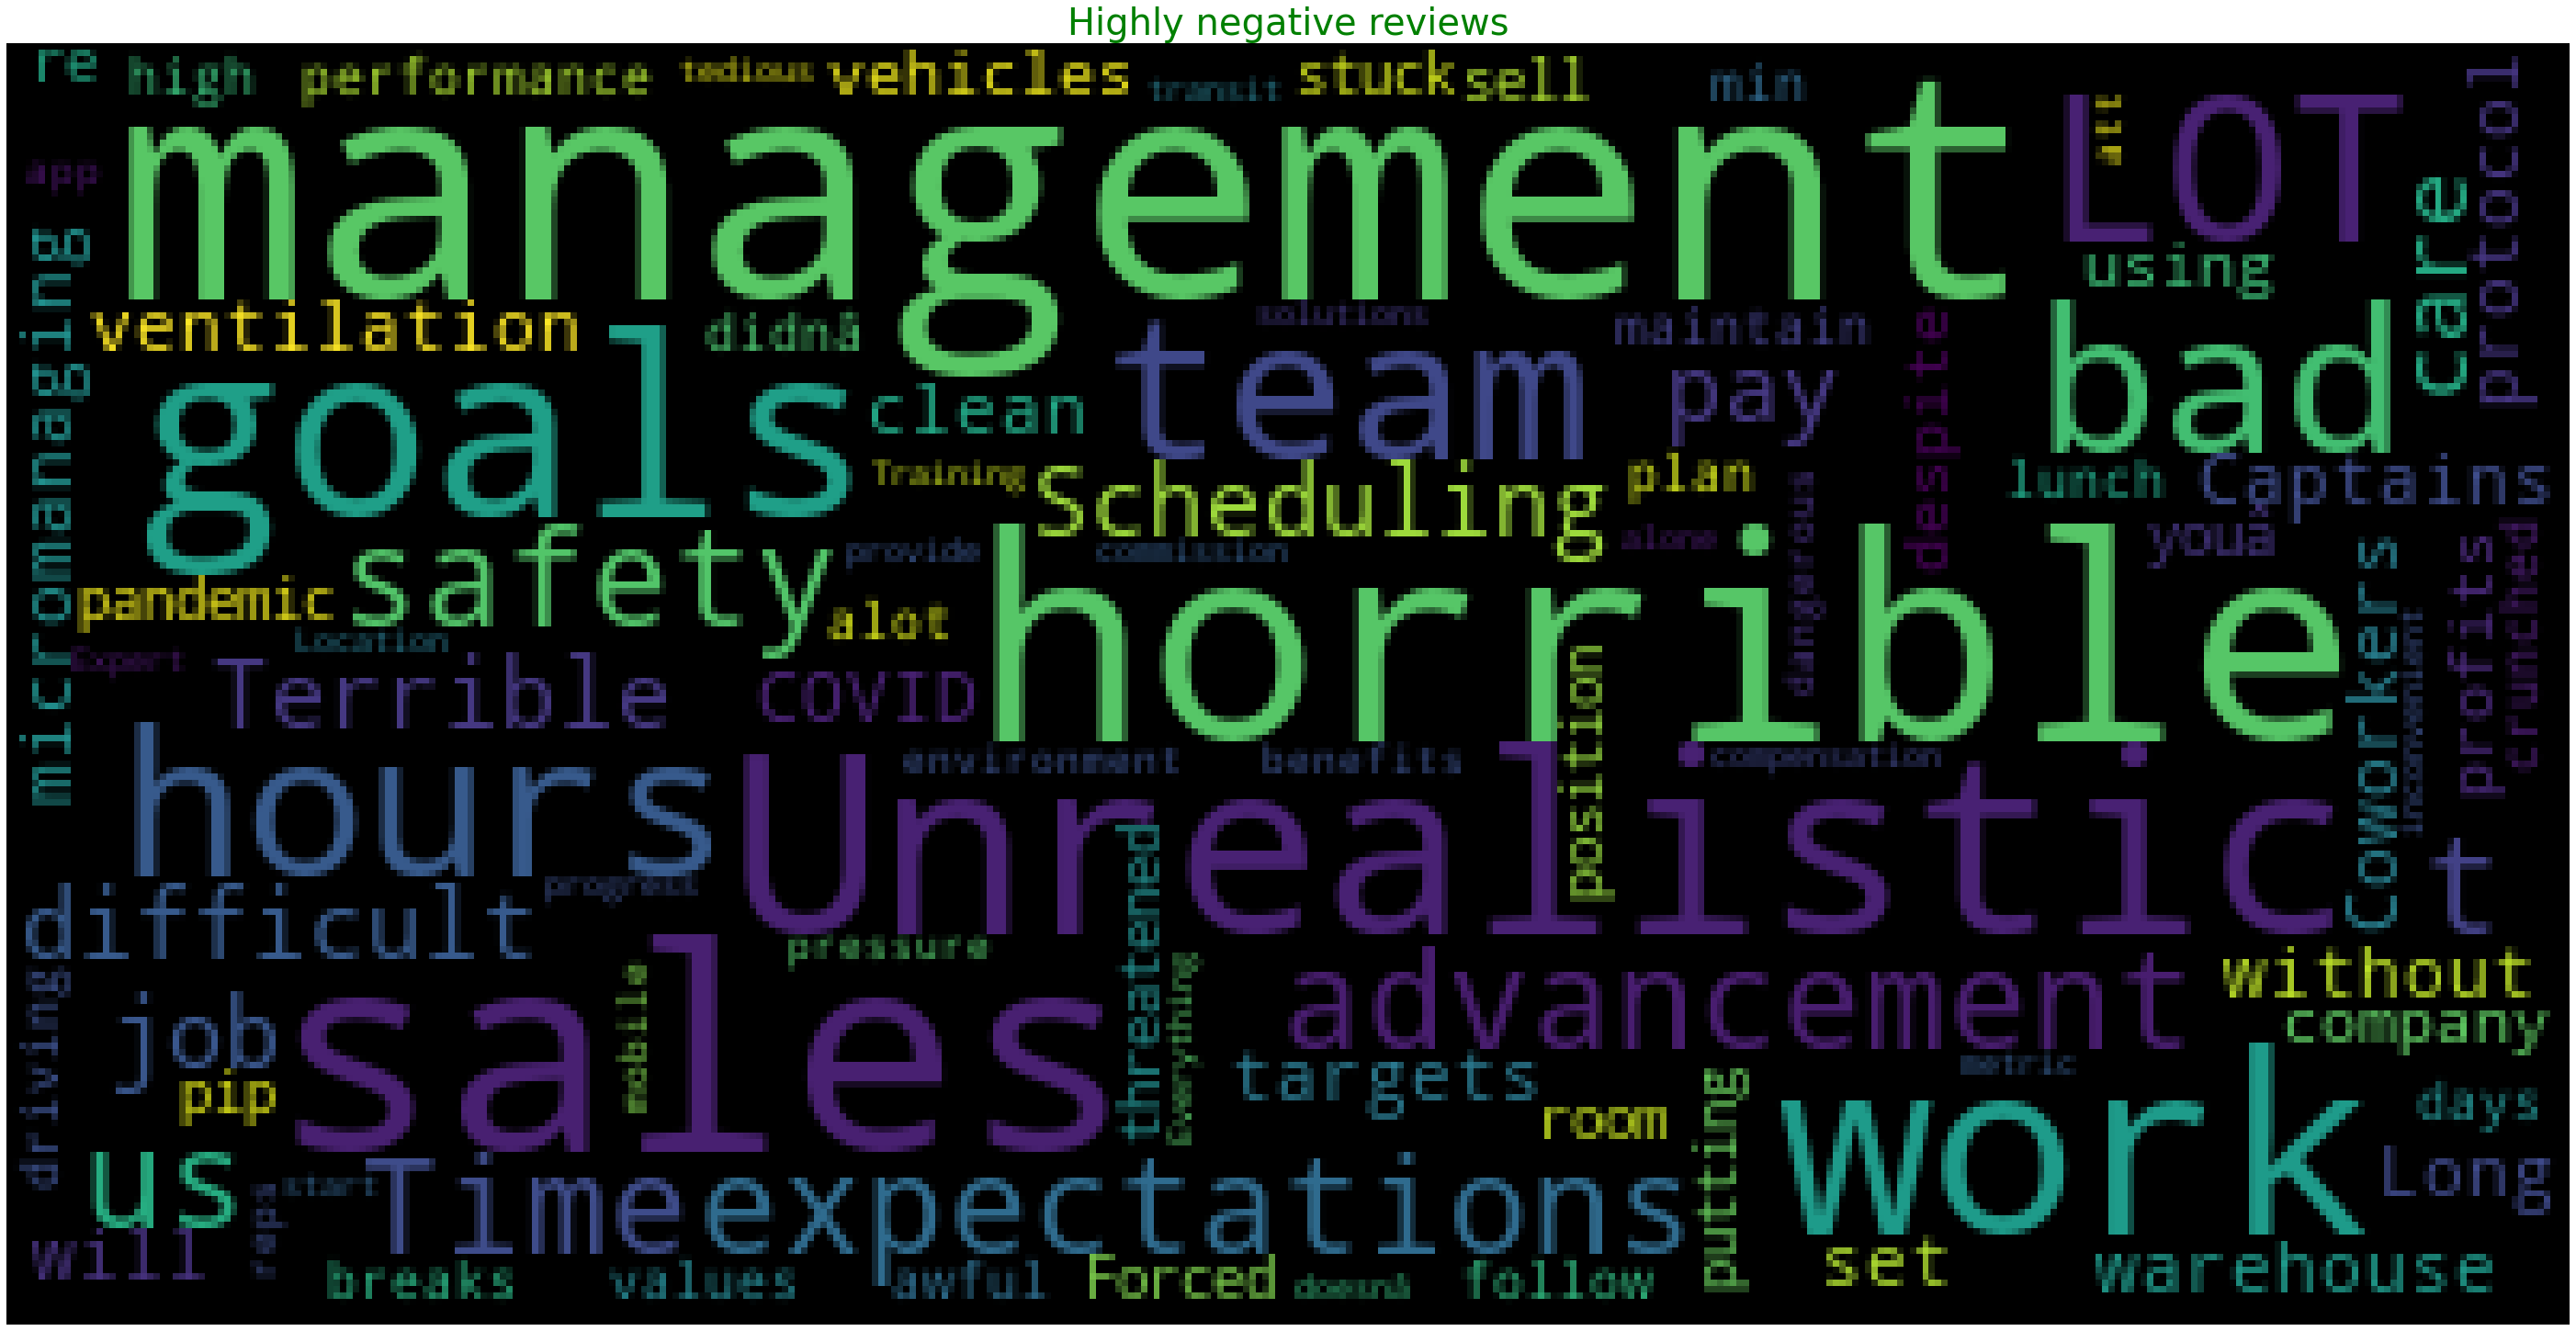

In [21]:
wc(cons_data['con'][cons_data.cons_polarity<-0.4],'black','Highly negative reviews' )

In [22]:
overallStar_mean = data.overallStar.replace(r'None','0').astype(float).mean()
workLifeStar_mean = data.workLifeStar.replace(r'None','0').astype(float).mean()
cultureStar_mean = data.cultureStar.replace(r'None','0').astype(float).mean()
careerOppStar_mean = data.careerOppStar.replace(r'None','0').astype(float).mean()
comBenefitsStar_mean = data.comBenefitsStar.replace(r'None','0').astype(float).mean()
srManagementStar_mean = data.srManagementStar.replace(r'None','0').astype(float).mean()

In [23]:
data.overallStar = data.overallStar.replace(r'None',overallStar_mean).astype('float')
data.workLifeStar = data.workLifeStar.replace(r'None',workLifeStar_mean).astype('float')
data.cultureStar = data.cultureStar.replace(r'None',cultureStar_mean).astype('float')
data.careerOppStar = data.careerOppStar.replace(r'None',careerOppStar_mean).astype('float')
data.comBenefitsStar = data.comBenefitsStar.replace(r'None',comBenefitsStar_mean).astype('float')
data.srManagementStar = data.srManagementStar.replace(r'None',srManagementStar_mean).astype('float')

# Overal Company rating

Text(0.5, 1.0, 'Overall ratings given to company, by All the employees')

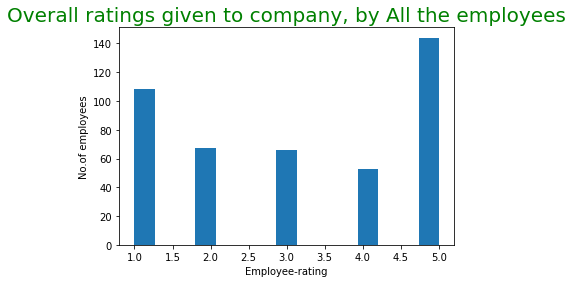

In [24]:
plt.hist(data['overallStar'], bins = 15)
plt.xlabel('Employee-rating')
plt.ylabel('No.of employees')
plt.title("Overall ratings given to company, by All the employees",fontsize=20,color='green')

# Work life balance

Text(0.5, 1.0, 'Ratings given to Work life balance, by all the employees')

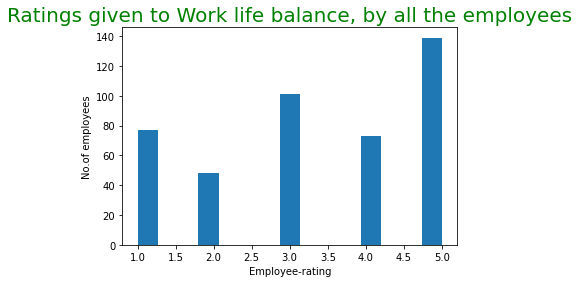

In [25]:
plt.hist(data['workLifeStar'], bins = 15)
plt.xlabel('Employee-rating')
plt.ylabel('No.of employees')
plt.title("Ratings given to Work life balance, by all the employees",fontsize=20,color='green')

# Culture & Values

Text(0.5, 1.0, 'Ratings given to Culture & Values, by all the employees')

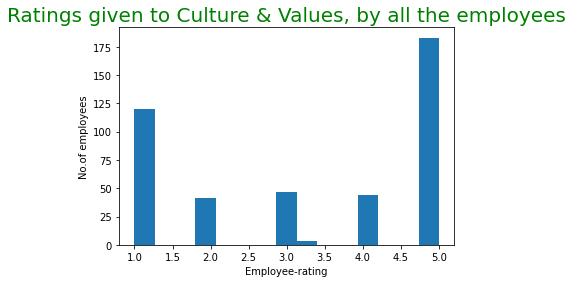

In [26]:
plt.hist(data['cultureStar'], bins = 15)
plt.xlabel('Employee-rating')
plt.ylabel('No.of employees')
plt.title("Ratings given to Culture & Values, by all the employees",fontsize=20,color='green')

# Career oppurtunities

Text(0.5, 1.0, 'Ratings given to Career opportunities, by all the employees')

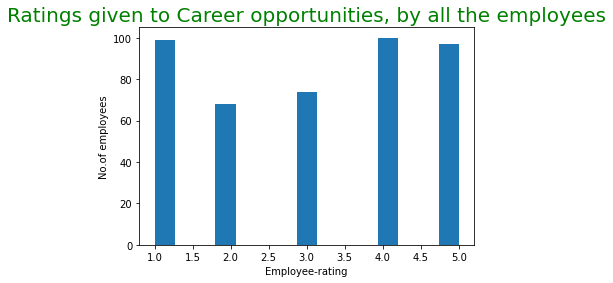

In [27]:
plt.hist(data['careerOppStar'], bins = 15)
plt.xlabel('Employee-rating')
plt.ylabel('No.of employees')
plt.title("Ratings given to Career opportunities, by all the employees",fontsize=20,color='green')

# Compensation & Benefits

Text(0.5, 1.0, 'Ratings given to Compensation & Benefits, by all the employees')

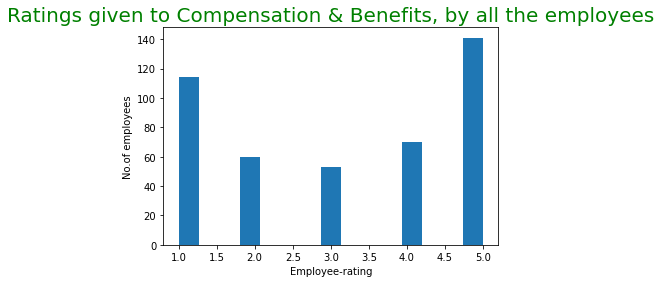

In [28]:
plt.hist(data['comBenefitsStar'], bins = 15)
plt.xlabel('Employee-rating')
plt.ylabel('No.of employees')
plt.title("Ratings given to Compensation & Benefits, by all the employees",fontsize=20,color='green')

# Senior Managment

Text(0.5, 1.0, 'Ratings given to Senior Managment, by all the employees')

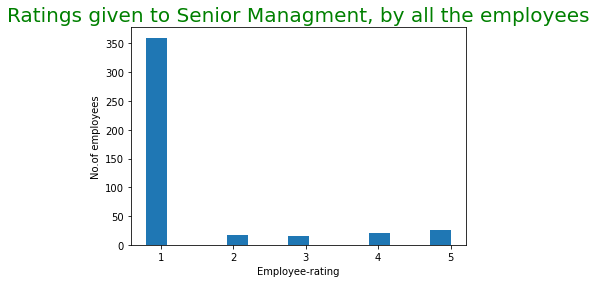

In [29]:
plt.hist(data['srManagementStar'], bins = 15)
plt.xlabel('Employee-rating')
plt.ylabel('No.of employees')
plt.title("Ratings given to Senior Managment, by all the employees",fontsize=20,color='green')

# Evaulating employee type column

In [30]:
employee_types = data['employeeType'].value_counts()
print('employee_types :', employee_types.shape[0])
print(employee_types)

employee_types : 5
Current Employee     268
Former Employee      154
Expert                 3
Software Engineer      1
Business               1
Name: employeeType, dtype: int64


In [31]:
employee_positions = data['position'].value_counts()
print('employee_positions :', employee_positions.shape[0])
print(employee_positions)

employee_positions : 78
Expert                         148
Anonymous Employee              61
Field Expert                    49
Mobile Expert                   17
None                            16
                              ... 
Tech Expert                      1
Customer Service Specialist      1
Recruiting                       1
Senior Software Engineer         1
Sales Representative             1
Name: position, Length: 78, dtype: int64


In [32]:
for i,position in enumerate(data['position']):
    if('expert' in position.lower()):
        data['position'][i]="Techinical expert"
    elif('tech' in position.lower()):
        data['position'][i]="Recruitment team"
    elif('manager' in position.lower()):
        data['position'][i]="Management"
    elif('leader' in position.lower()):
        data['position'][i]="Management"
    elif('recruit' in position.lower()):
        data['position'][i]="Recruitment team"
    elif('fulfillment' in position.lower()):
        data['position'][i]="Recruitment team"
    elif('lead' in position.lower()):
        data['position'][i]="Team leads"
    elif('anonymous' in position.lower()):
        data['position'][i]="miscellaneous"
    elif('software' in position.lower()):
        data['position'][i]="Software engineers"
    else:
        data['position'][i]="miscellaneous"
         

In [33]:
employee_positions = data['position'].value_counts()
print('employee_positions :', employee_positions.shape[0])
print(employee_positions)

employee_positions : 5
Techinical expert     278
miscellaneous         118
Recruitment team       26
Management             12
Software engineers      4
Name: position, dtype: int64


In [34]:
employee_positions = data['position'].unique()
employee_positions

array(['Techinical expert', 'Recruitment team', 'miscellaneous',
       'Management', 'Software engineers'], dtype=object)

# Company overall rating given different category of employees

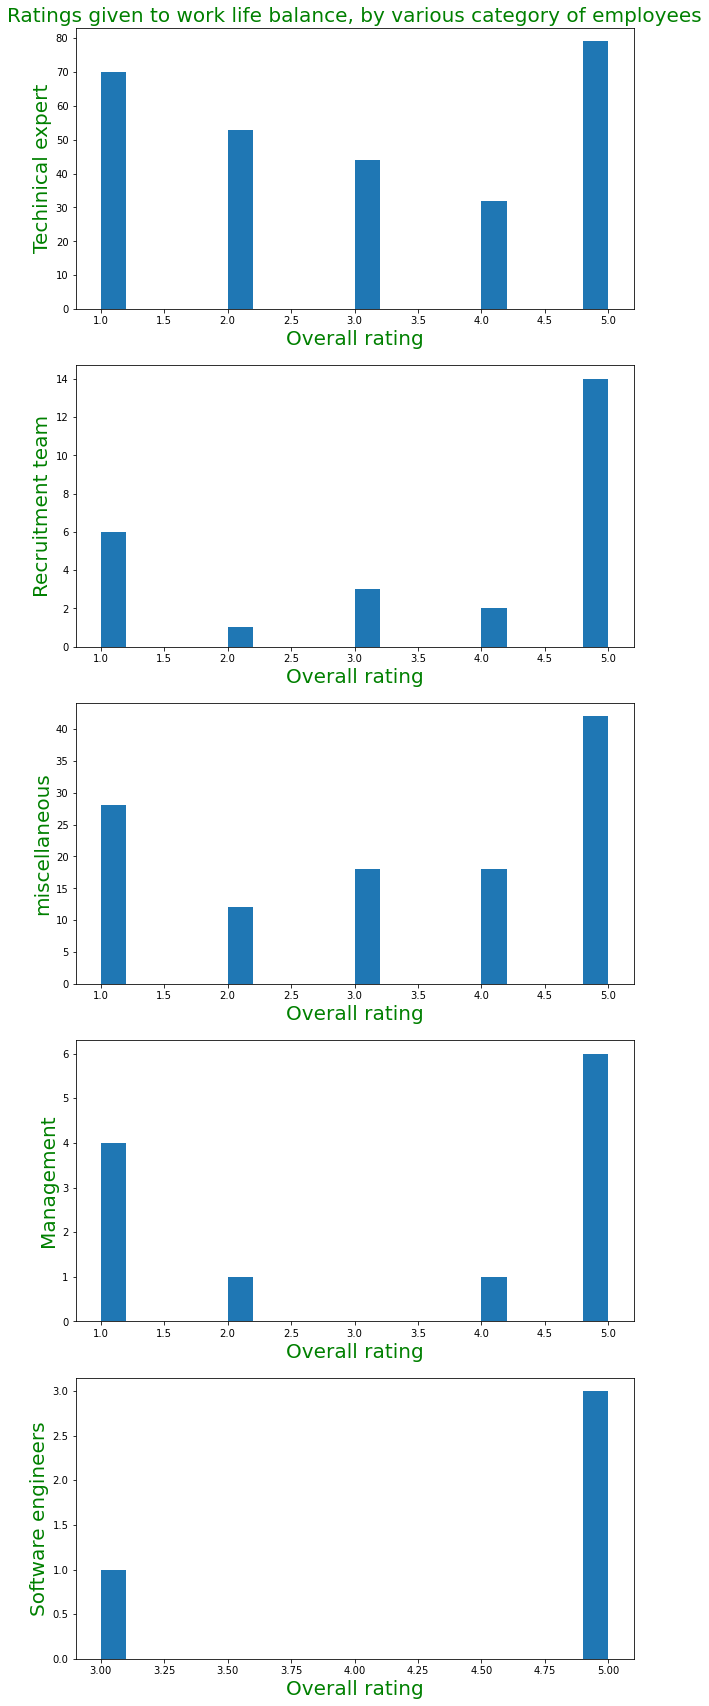

In [35]:
plt.figure(figsize=(10,30))
for i,position in enumerate(employee_positions):
    plt.subplot(5,1,i+1)
    plt.hist(data[data['position']==position]['overallStar'], bins=20)
    plt.xlabel('Overall rating',fontsize=20,color='green')
    plt.ylabel(ylabel=position,fontsize=20,color='green')
    if(i==0):
        plt.title("Ratings given to work life balance, by various category of employees",fontsize=20,color='green')
    
   

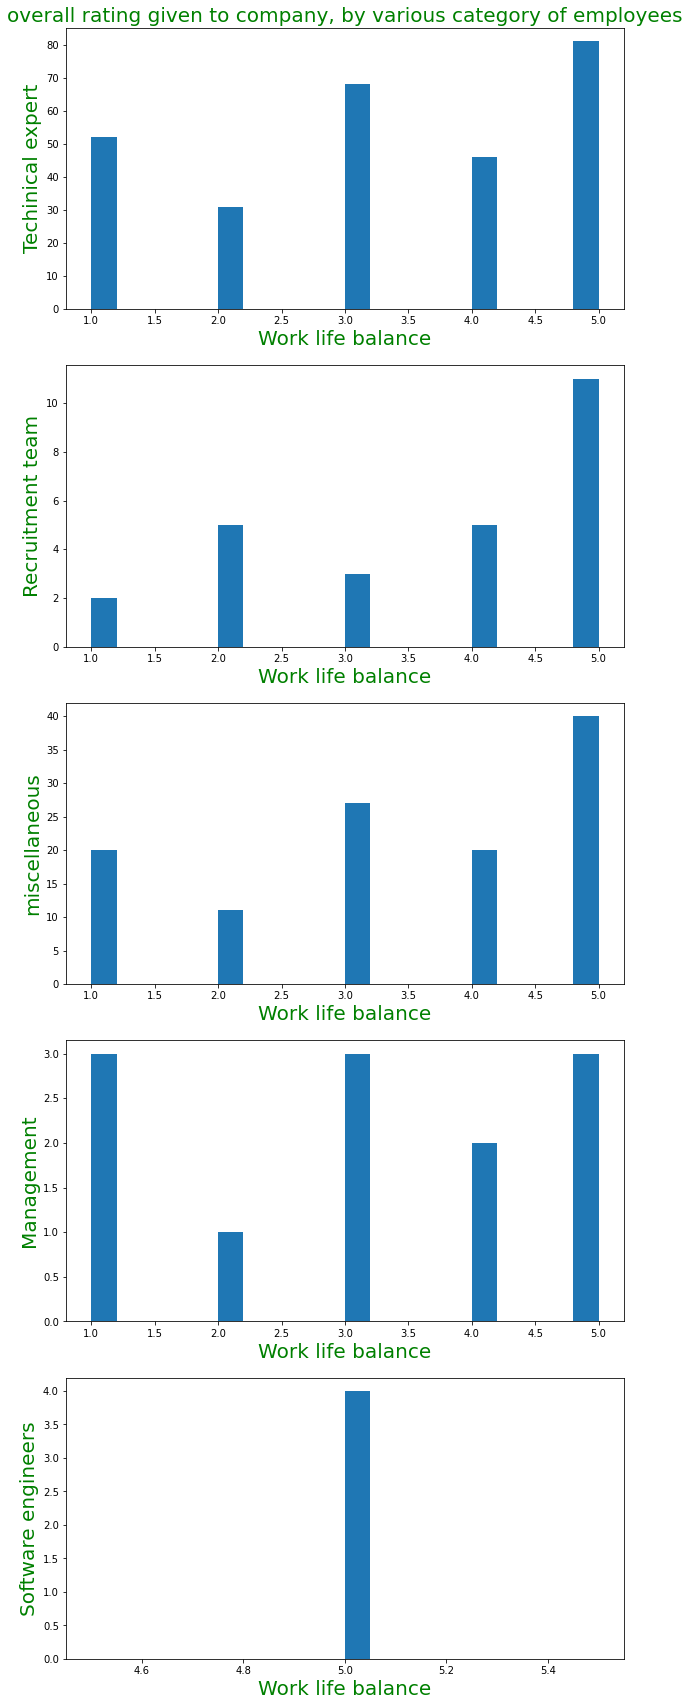

In [36]:
plt.figure(figsize=(10,30))
for i,position in enumerate(employee_positions):
    plt.subplot(5,1,i+1)
    plt.hist(data[data['position']==position]['workLifeStar'], bins=20)
    plt.xlabel('Work life balance',fontsize=20,color='green')
    plt.ylabel(ylabel = position,fontsize=20,color='green')
    if(i==0):
        plt.title("overall rating given to company, by various category of employees",fontsize=20,color='green')
   # plt.xticks(rotation=45)

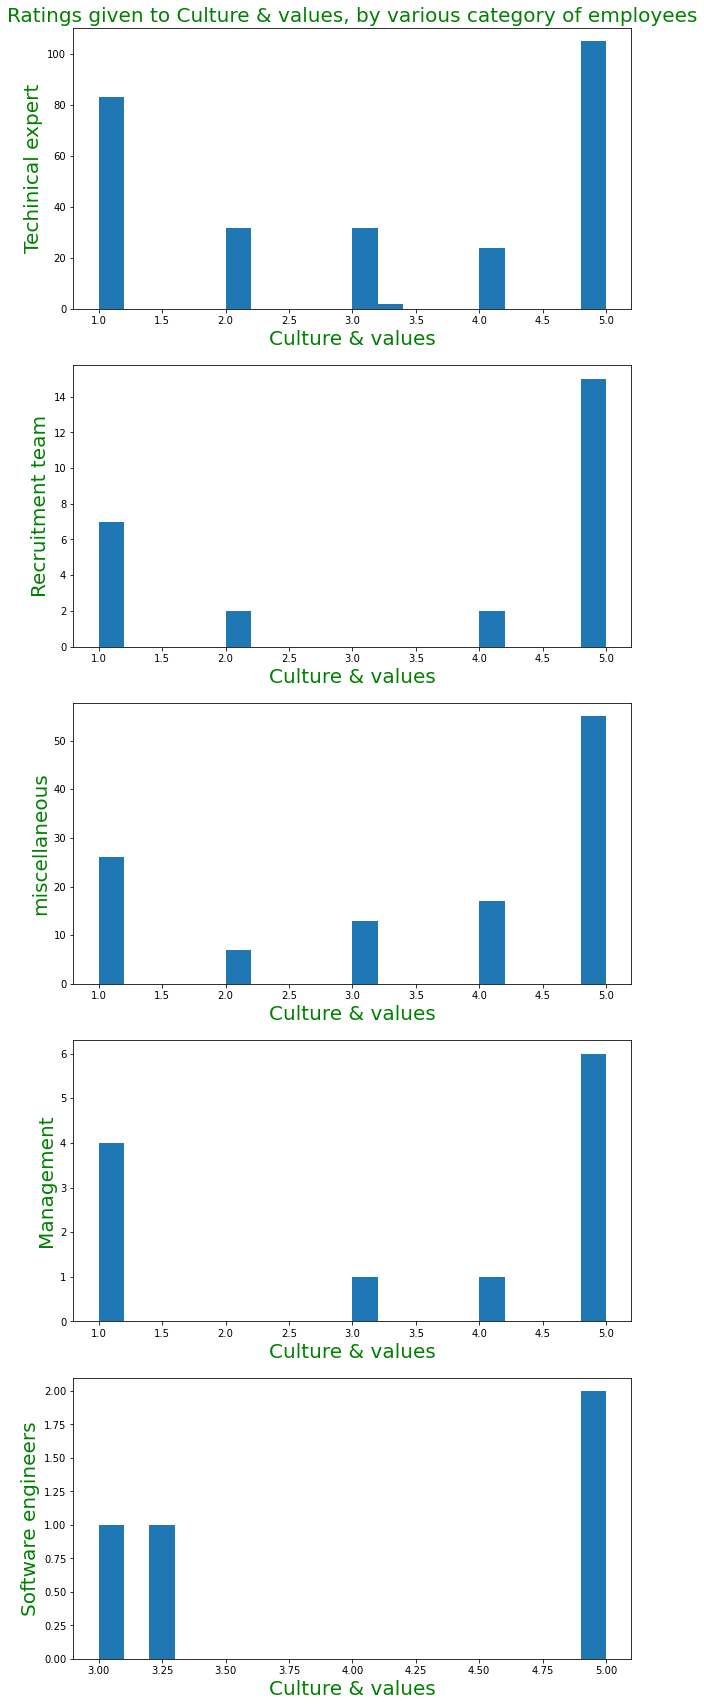

In [37]:
plt.figure(figsize=(10,30))
for i,position in enumerate(employee_positions):
    plt.subplot(5,1,i+1)
    plt.hist(data[data['position']==position]['cultureStar'], bins=20)
    plt.xlabel('Culture & values',fontsize=20,color='green')
    plt.ylabel(ylabel = position,fontsize=20,color='green')
    if(i==0):
        plt.title("Ratings given to Culture & values, by various category of employees",fontsize=20,color='green')
   # plt.xticks(rotation=45)

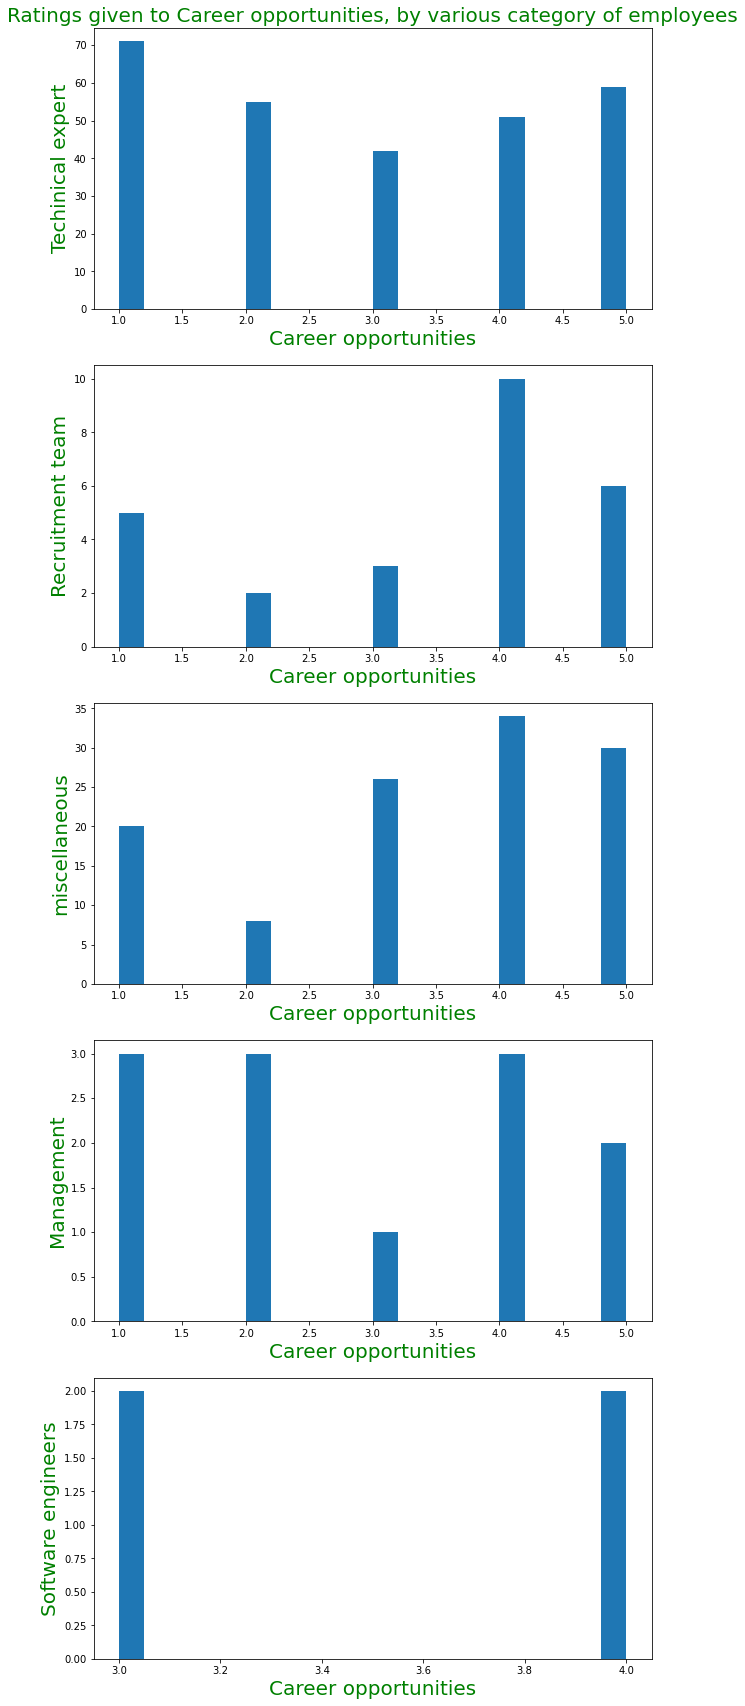

In [38]:
plt.figure(figsize=(10,30))
for i,position in enumerate(employee_positions):
    plt.subplot(5,1,i+1)
    plt.hist(data[data['position']==position]['careerOppStar'], bins=20)
    plt.xlabel('Career opportunities',fontsize=20,color='green')
    plt.ylabel(ylabel=position,fontsize=20,color='green')
    if(i==0):
        plt.title("Ratings given to Career opportunities, by various category of employees",fontsize=20,color='green')
   # plt.xticks(rotation=45)

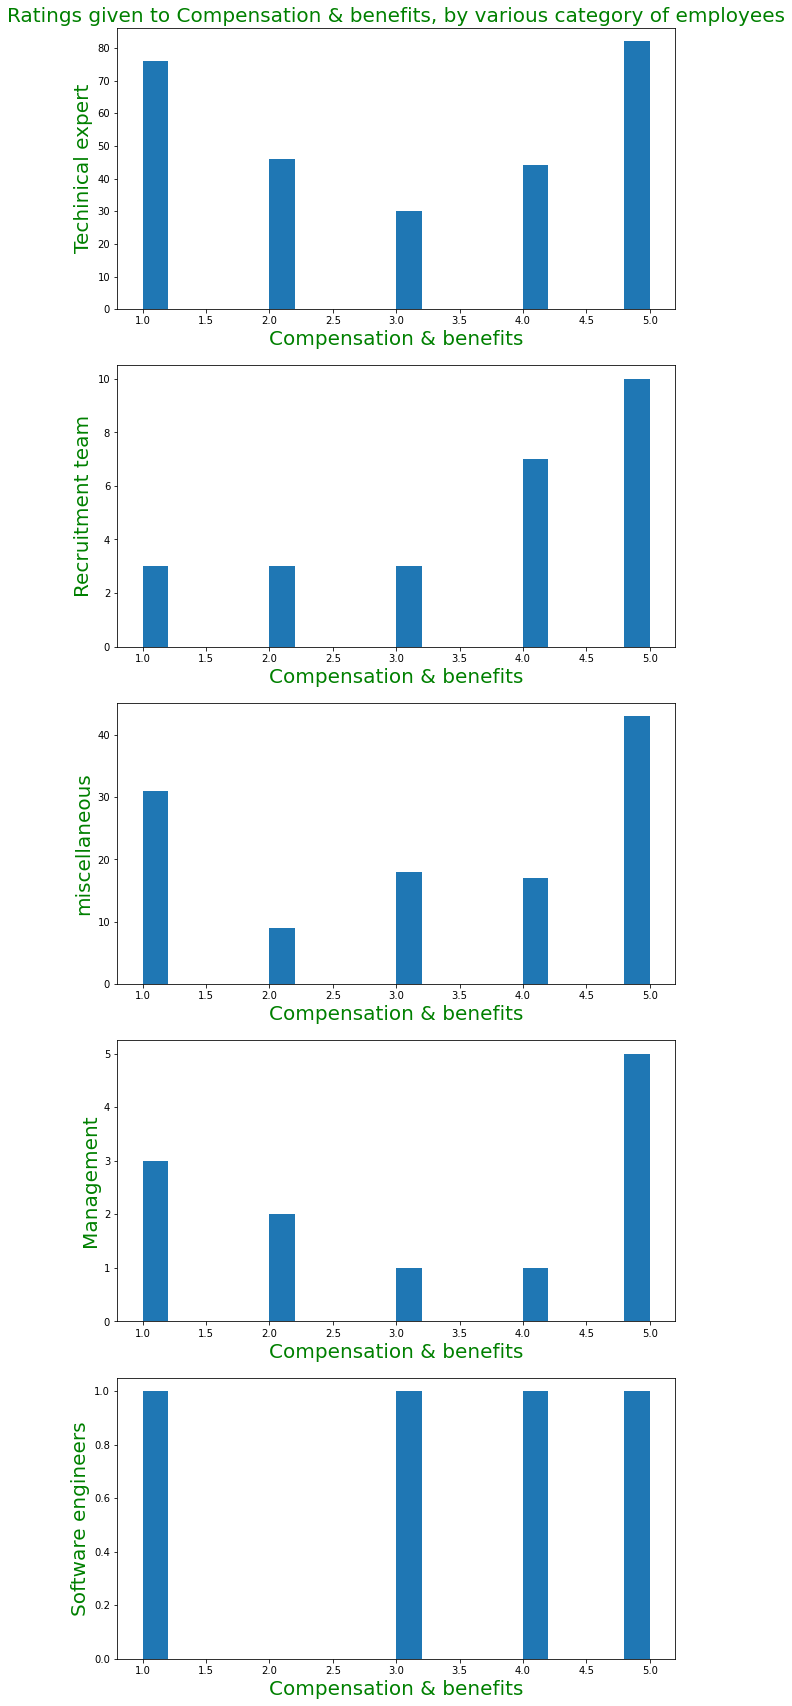

In [39]:
plt.figure(figsize=(10,30))
for i,position in enumerate(employee_positions):
    plt.subplot(5,1,i+1)
    plt.hist(data[data['position']==position]['comBenefitsStar'], bins=20)
    plt.xlabel('Compensation & benefits',fontsize=20,color='green')
    plt.ylabel(ylabel=position,fontsize=20,color='green')
    if(i==0):
        plt.title("Ratings given to Compensation & benefits, by various category of employees",fontsize=20,color='green')
    
   # plt.xticks(rotation=45)

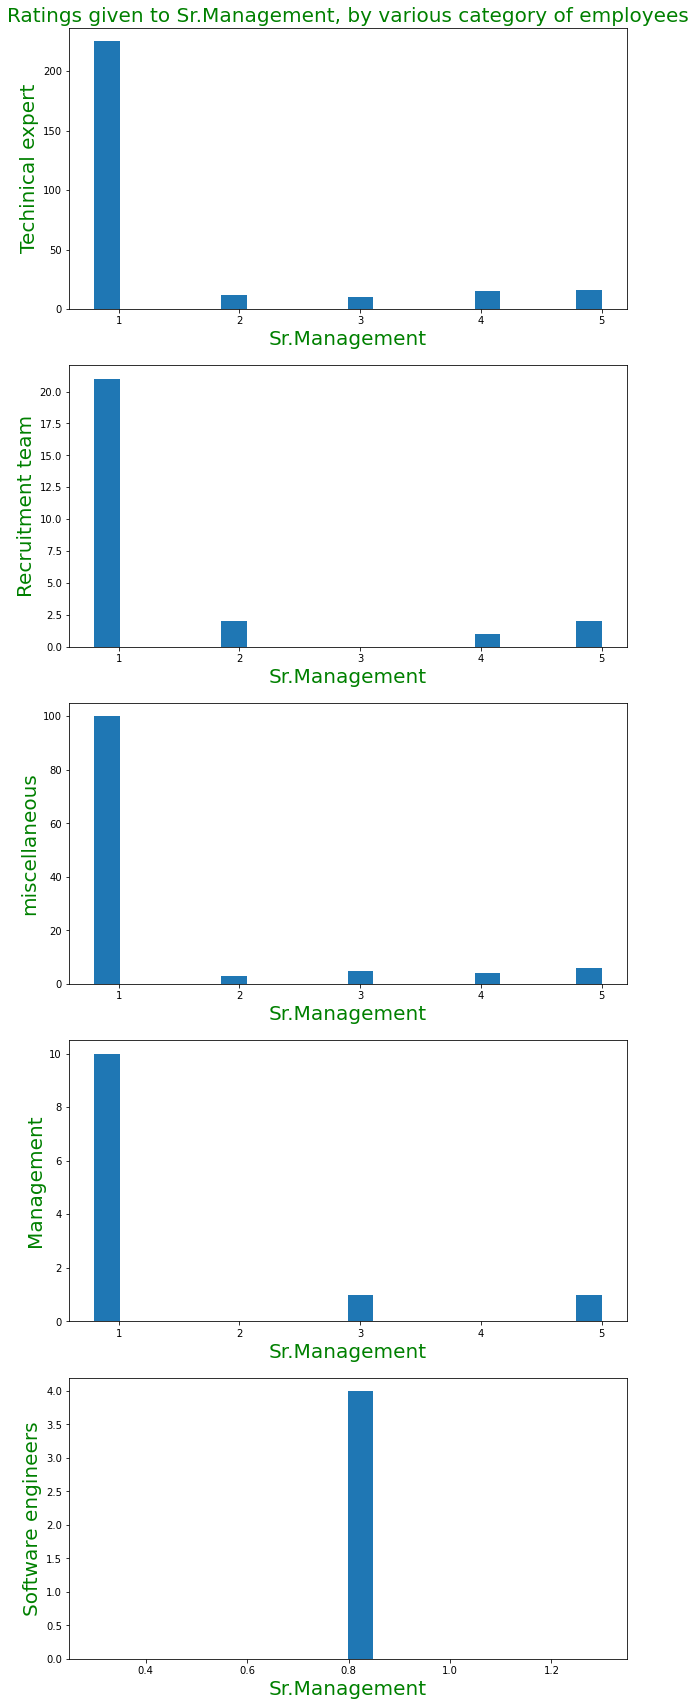

In [40]:
plt.figure(figsize=(10,30))
for i,position in enumerate(employee_positions):
    plt.subplot(5,1,i+1)
    plt.hist(data[data['position']==position]['srManagementStar'], bins=20)
    plt.xlabel('Sr.Management',fontsize=20,color='green')
    plt.ylabel(ylabel=position,fontsize=20,color='green')
    if(i==0):
        plt.title("Ratings given to Sr.Management, by various category of employees",fontsize=20,color='green')
   # plt.xticks(rotation=45)

In [41]:
employee_locations = data['Location'].unique()
employee_locations

array(['MW', nan, 'E', 'UK', 'W', 'SE', 'C', 'N'], dtype=object)

In [42]:
employee_locations = np.delete(employee_locations,[1])

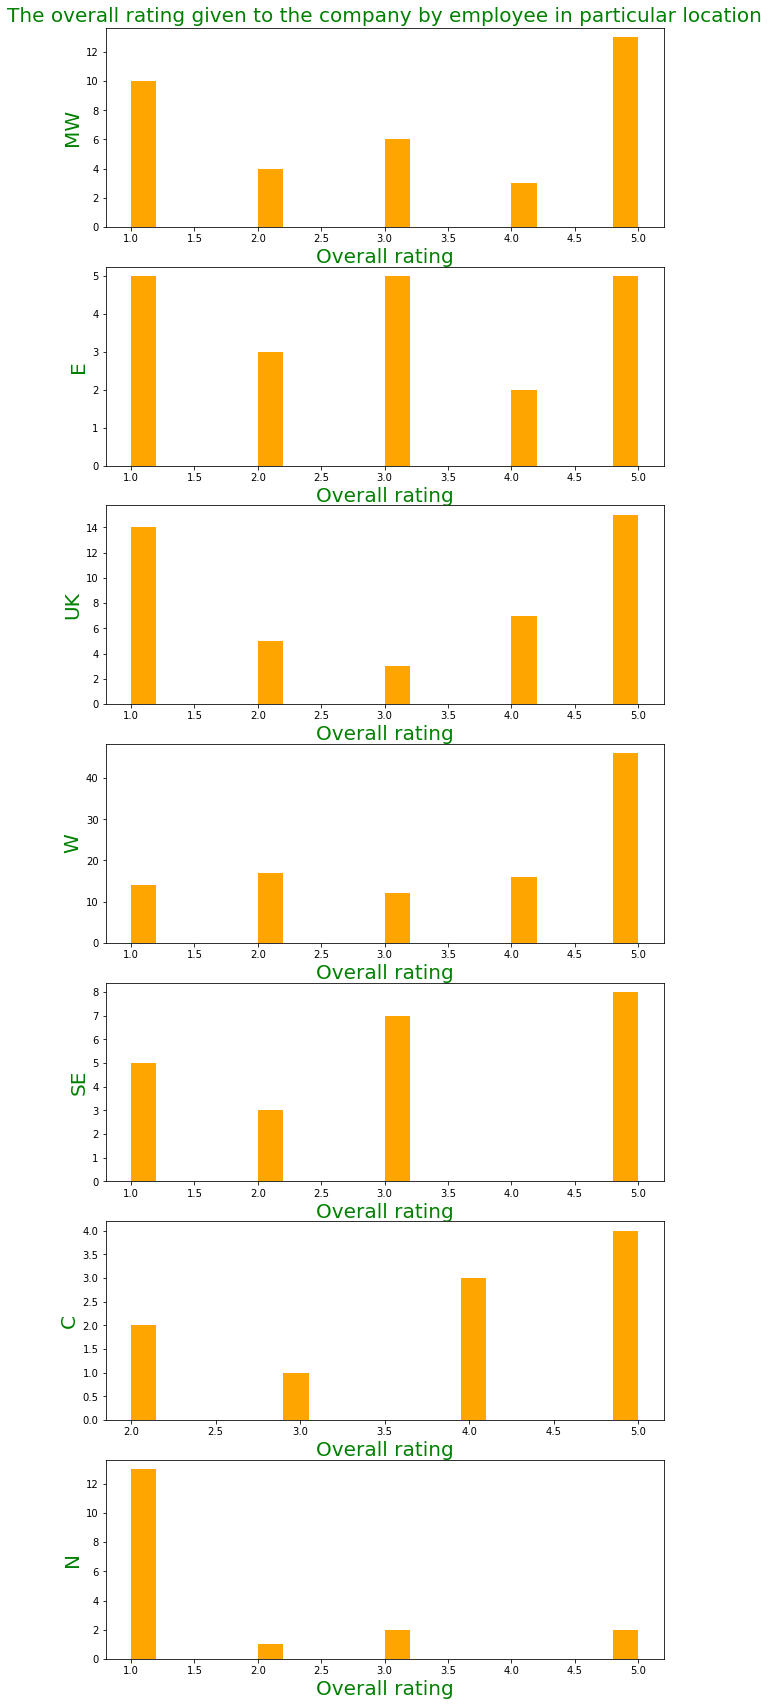

In [43]:
plt.figure(figsize=(10,30))
for i,location in enumerate(employee_locations):
    plt.subplot(7,1,i+1)
    plt.hist(data[data['Location']==location]['overallStar'], bins=20,color ='orange')
    plt.xlabel('Overall rating',fontsize=20,color='green')
    plt.ylabel(ylabel = location, fontsize=20, color='green')
    if(i==0):
        plt.title('The overall rating given to the company by employee in particular location',fontsize=20,color='green')
   # plt.xticks(rotation=45)

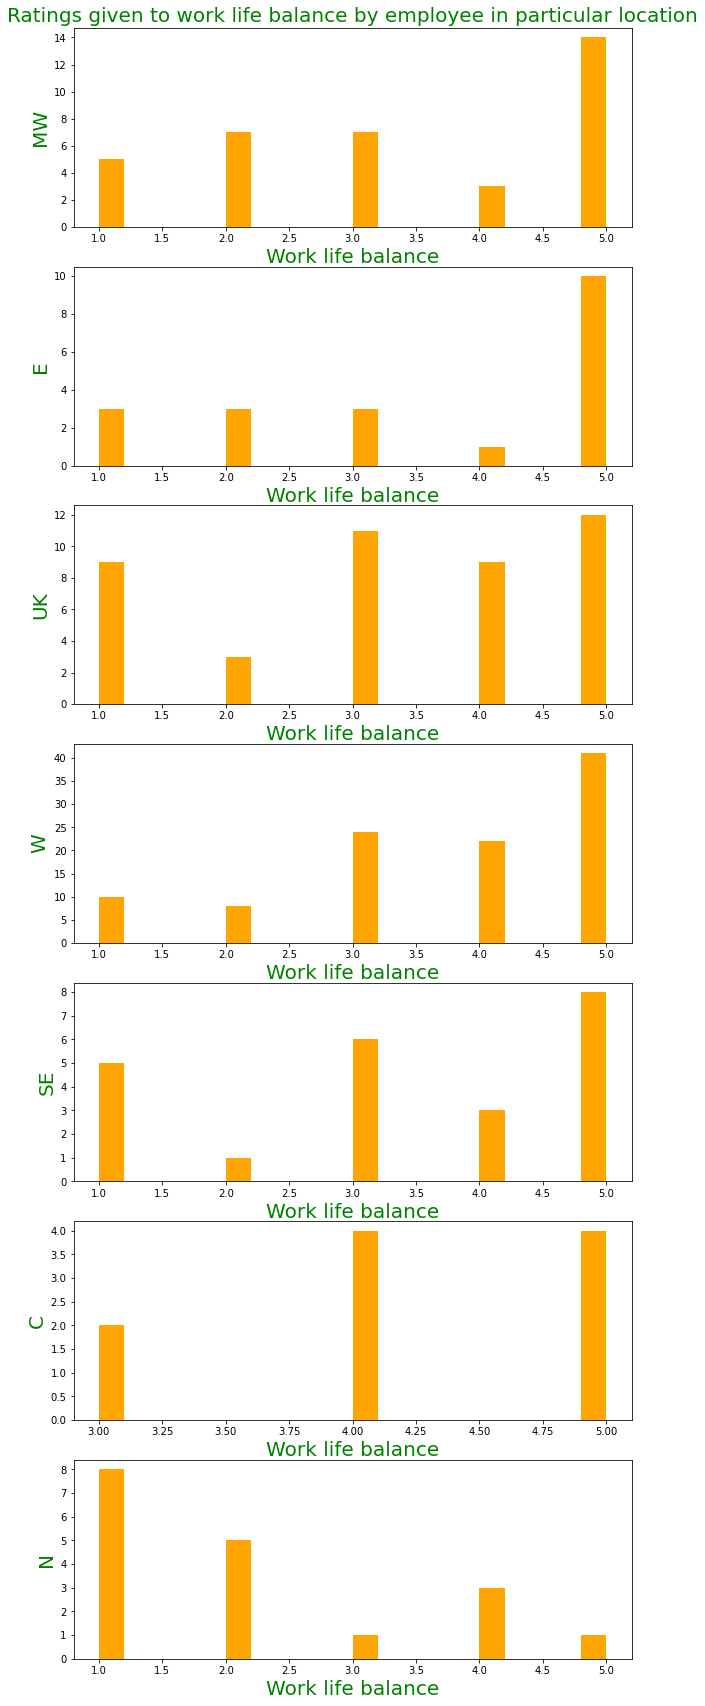

In [44]:
plt.figure(figsize=(10,30))
for i,location in enumerate(employee_locations):
    plt.subplot(7,1,i+1)
    plt.hist(data[data['Location']==location]['workLifeStar'], bins=20,color ='orange')
    plt.xlabel('Work life balance',fontsize=20,color='green')
    plt.ylabel(ylabel = location, fontsize=20, color='green')
    if(i==0):
        plt.title('Ratings given to work life balance by employee in particular location',fontsize=20,color='green')
   # plt.xticks(rotation=45)

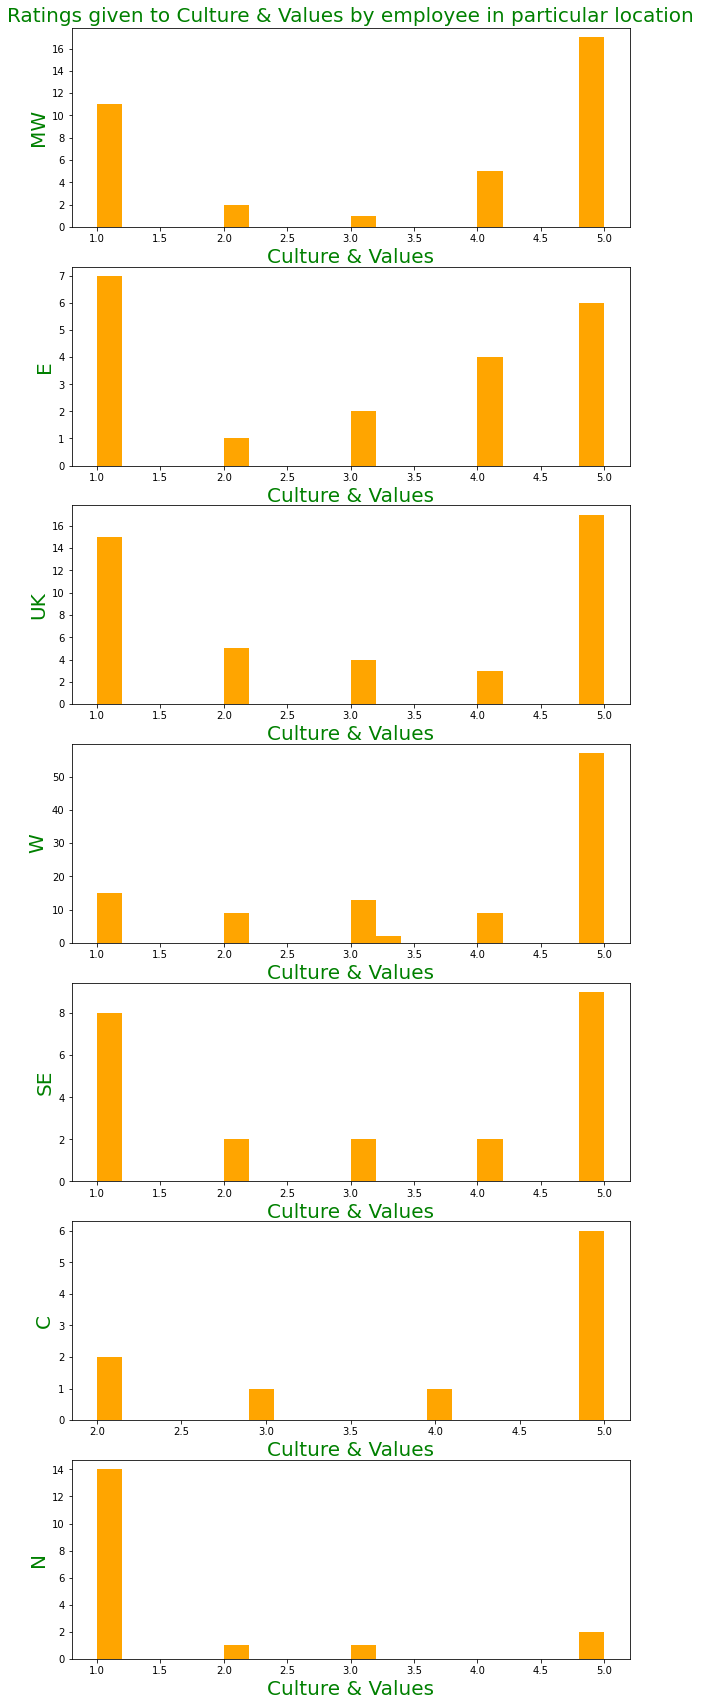

In [45]:
plt.figure(figsize=(10,30))
for i,location in enumerate(employee_locations):
    plt.subplot(7,1,i+1)
    plt.hist(data[data['Location']==location]['cultureStar'], bins=20,color ='orange')
    plt.xlabel('Culture & Values',fontsize=20,color='green')
    plt.ylabel(ylabel = location, fontsize=20, color='green')
    if(i==0):
        plt.title('Ratings given to Culture & Values by employee in particular location',fontsize=20,color='green')
   # plt.xticks(rotation=45)

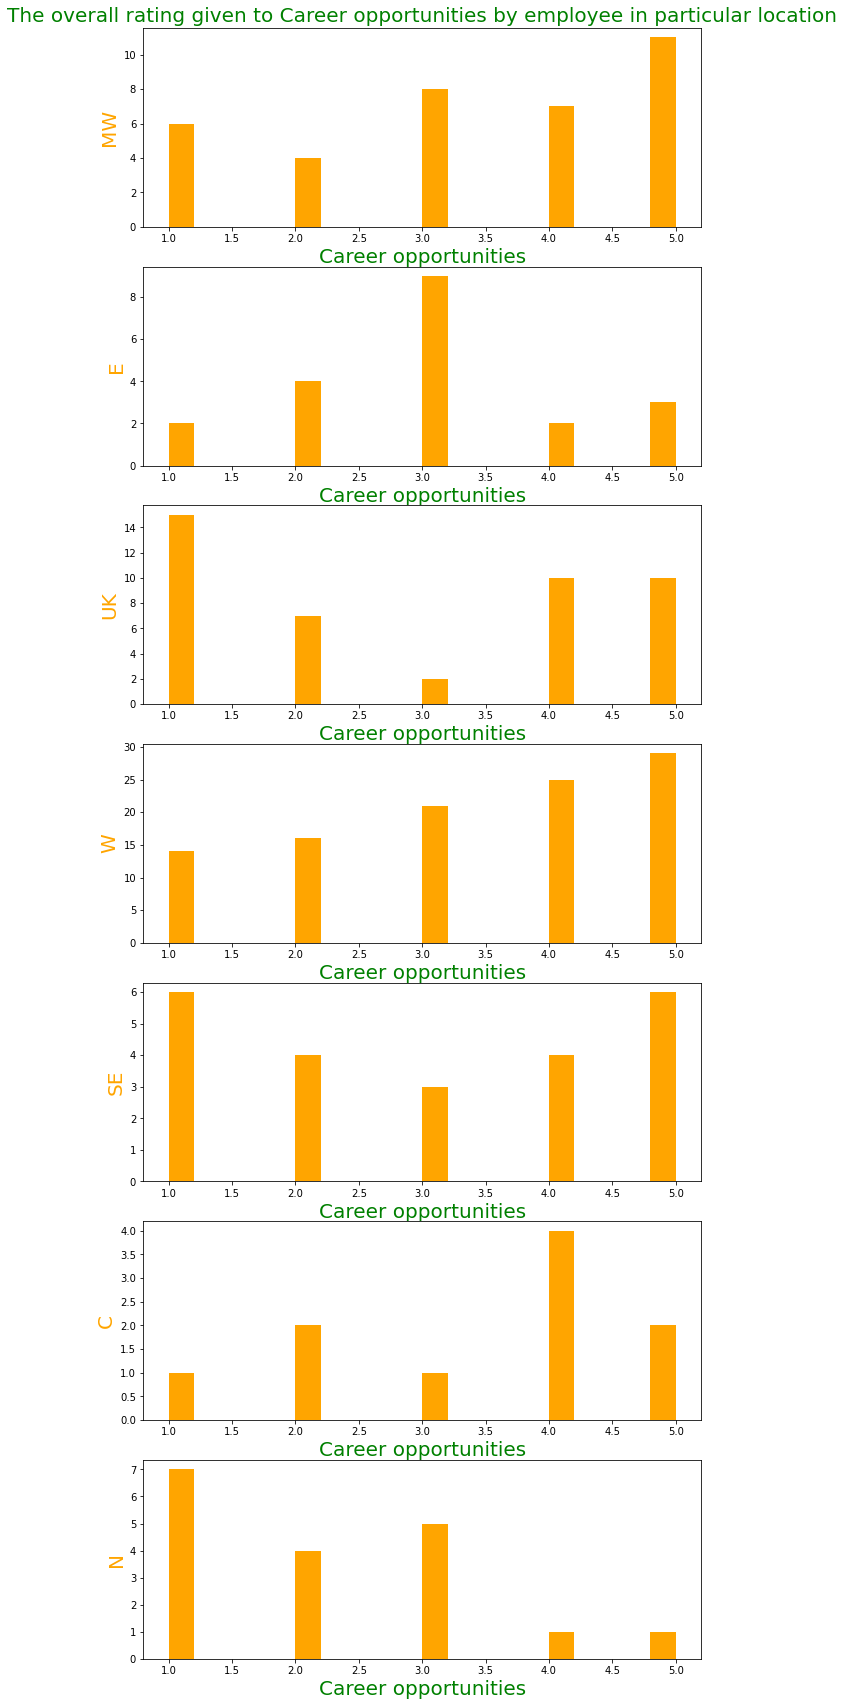

In [46]:
plt.figure(figsize=(10,30))
for i,location in enumerate(employee_locations):
    plt.subplot(7,1,i+1)
    plt.hist(data[data['Location']==location]['careerOppStar'], bins=20,color ='orange')
    plt.xlabel('Career opportunities',fontsize=20,color='green')
    plt.ylabel(ylabel = location, fontsize=20, color='orange')
    if(i==0):
        plt.title('The overall rating given to Career opportunities by employee in particular location',fontsize=20,color='green')
   # plt.xticks(rotation=45)

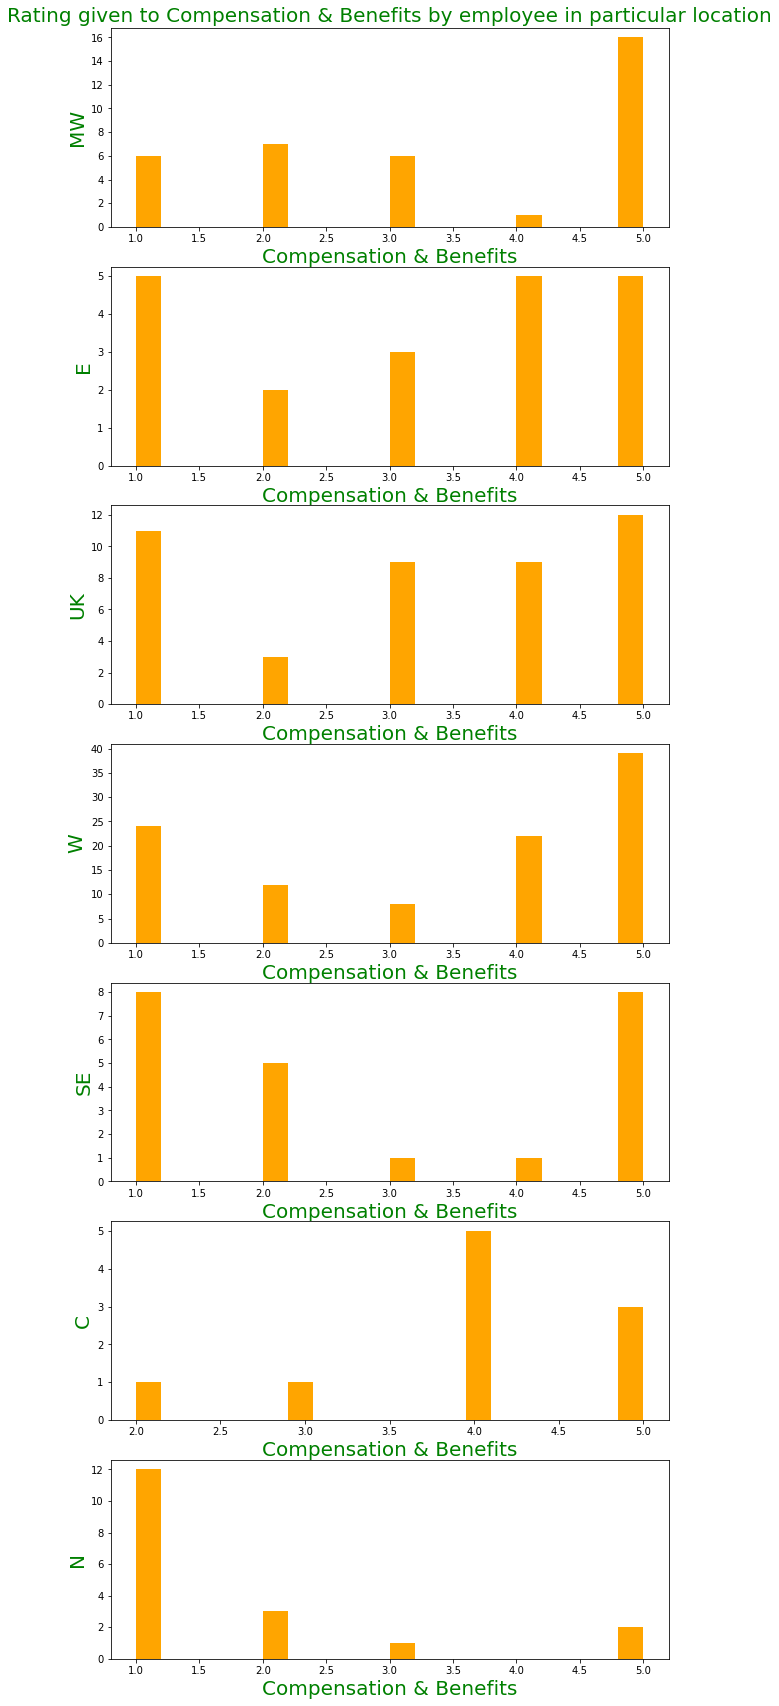

In [47]:
plt.figure(figsize=(10,30))
for i,location in enumerate(employee_locations):
    plt.subplot(7,1,i+1)
    plt.hist(data[data['Location']==location]['comBenefitsStar'], bins=20,color ='orange')
    plt.xlabel('Compensation & Benefits',fontsize=20,color='green')
    plt.ylabel(ylabel = location, fontsize=20, color='green')
    if(i==0):
        plt.title('Rating given to Compensation & Benefits by employee in particular location',fontsize=20,color='green')
   # plt.xticks(rotation=45)

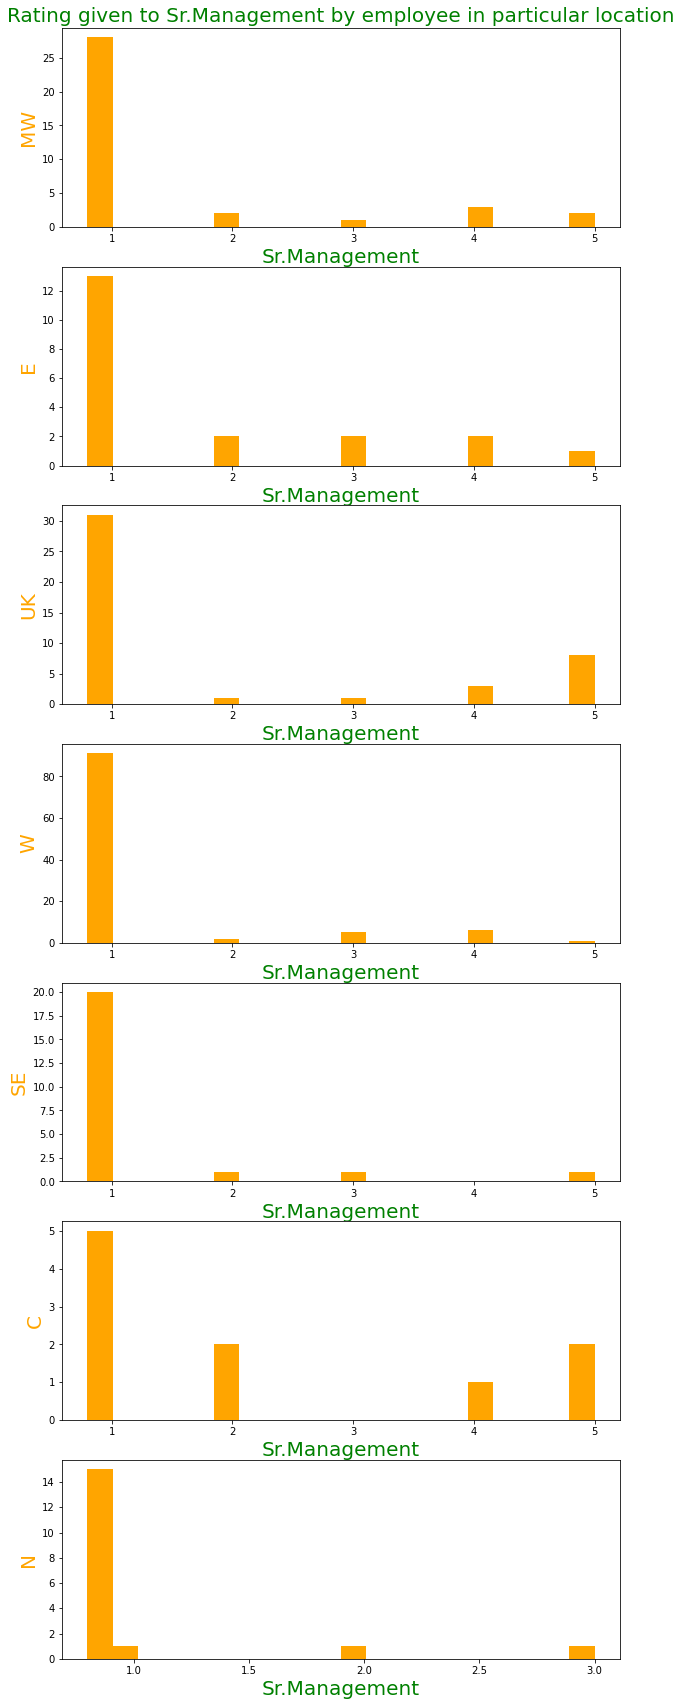

In [48]:
plt.figure(figsize=(10,30))
for i,location in enumerate(employee_locations):
    plt.subplot(7,1,i+1)
    plt.hist(data[data['Location']==location]['srManagementStar'], bins=20,color ='orange')
    plt.xlabel('Sr.Management',fontsize=20,color='green')
    plt.ylabel(ylabel = location, fontsize=20, color='orange')
    if(i==0):
        plt.title('Rating given to Sr.Management by employee in particular location',fontsize=20,color='green')
   # plt.xticks(rotation=45)

In [49]:
data['date'] = data['date'].replace('None',0)

In [50]:
from time import strptime

for i,date in enumerate(data['date']):
    if date !=0:
        date_list = date.split("-")
        date_list[1] = strptime(date_list[1],'%b').tm_mon
        date_list[2] = str(int(date_list[2])+2000)    
        date_list = "-".join(map(str,date_list))
        #quarter = date_list.dt.to_period('Q')
        date_list = pd.to_datetime(date_list, errors='coerce')
        date_list=date_list.to_period('Q')
        date = str(date_list).split('\n')[0]
        data['date'][i] = date

In [51]:
quarters = data['date'].unique()

In [52]:
quarters.sort()

In [53]:
quarters

array(['2016Q1', '2016Q2', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1',
       '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
       '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4'], dtype=object)

In [54]:
data[data['date']=='2021Q2']['overallStar']

0      4.0
1      1.0
4      4.0
6      5.0
7      1.0
9      3.0
11     4.0
15     3.0
16     5.0
19     1.0
21     4.0
23     5.0
33     1.0
38     1.0
43     3.0
47     2.0
48     2.0
78     5.0
79     5.0
104    5.0
119    1.0
154    1.0
Name: overallStar, dtype: float64

In [55]:
overallStar_quarter_mean_dict = {}
workLifeStar_quarter_mean_dict = {}
cultureStar_quarter_mean_dict = {}
careerOppStar_quarter_mean_dict = {}
comBenefitsStar_quarter_mean_dict = {}
srManagementStar_quarter_mean_dict = {}

for quarter in quarters:
    overallStar_quarter_mean_dict[quarter] = data[data['date']==quarter]['overallStar'].mean()
    workLifeStar_quarter_mean_dict[quarter] = data[data['date']==quarter]['workLifeStar'].mean()
    cultureStar_quarter_mean_dict[quarter] = data[data['date']==quarter]['cultureStar'].mean()
    careerOppStar_quarter_mean_dict[quarter] = data[data['date']==quarter]['careerOppStar'].mean()
    comBenefitsStar_quarter_mean_dict[quarter] = data[data['date']==quarter]['comBenefitsStar'].mean()
    srManagementStar_quarter_mean_dict[quarter] = data[data['date']==quarter]['srManagementStar'].mean()
       

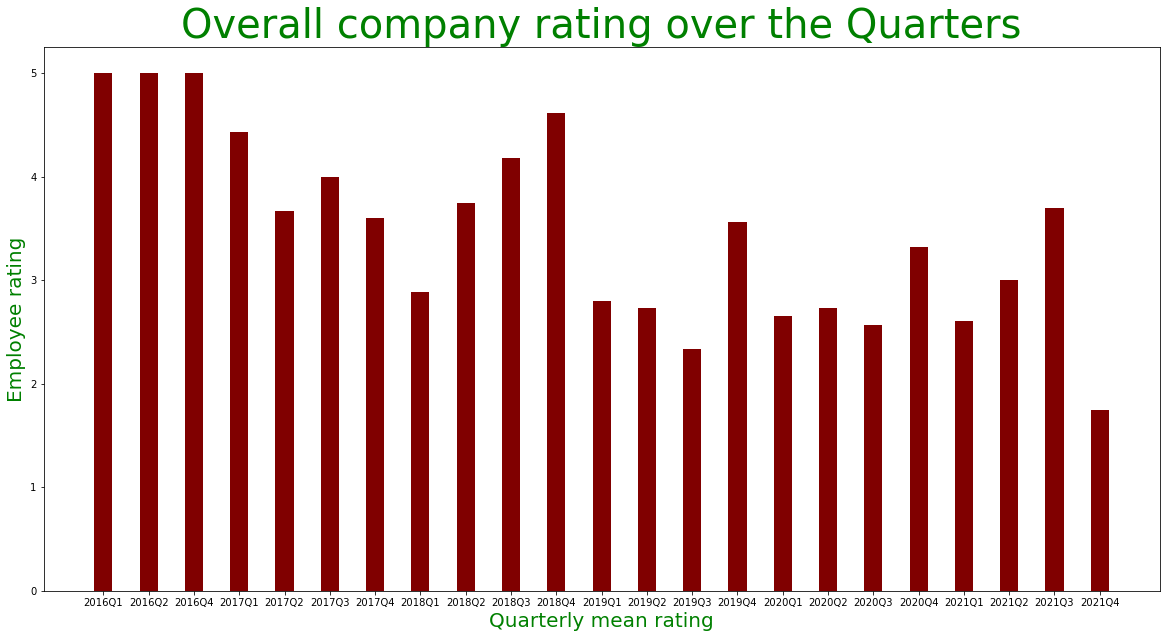

In [56]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(overallStar_quarter_mean_dict.keys(), overallStar_quarter_mean_dict.values(),color ='maroon',width = 0.4) 
plt.xlabel("Quarterly mean rating",fontsize = 20,color="green")
plt.ylabel("Employee rating",fontsize = 20,color="green")
plt.title(label="Overall company rating over the Quarters",
          fontsize=40,
          color="green")
plt.show()

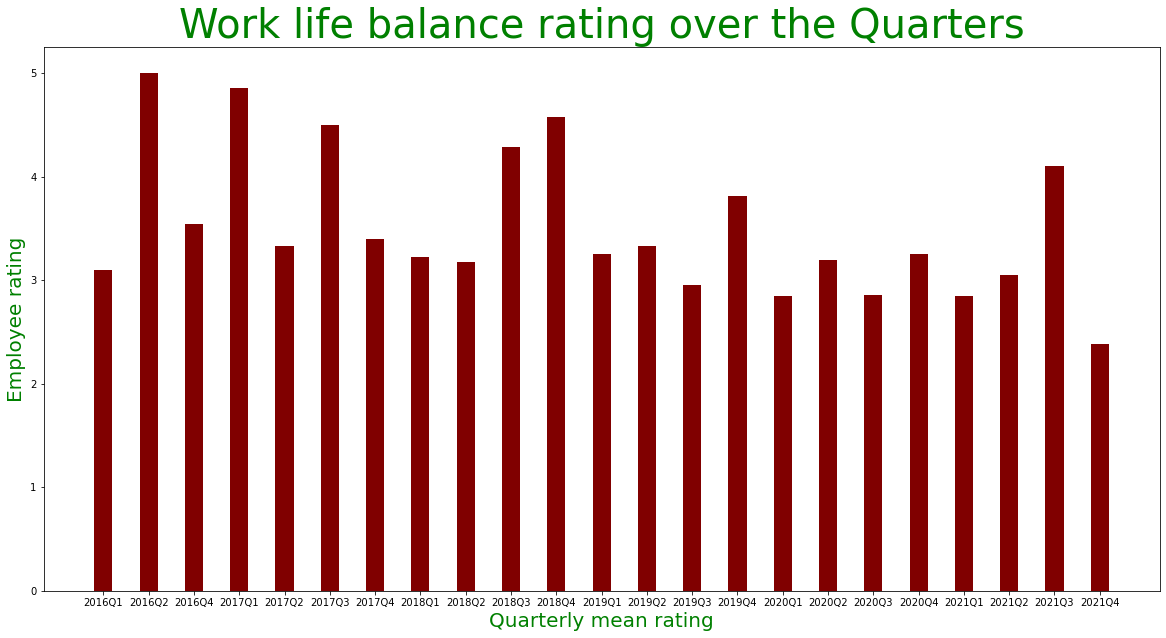

In [57]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(workLifeStar_quarter_mean_dict.keys(), workLifeStar_quarter_mean_dict.values(),color ='maroon',width = 0.4) 
plt.xlabel("Quarterly mean rating",fontsize = 20,color="green")
plt.ylabel("Employee rating",fontsize = 20,color="green")
plt.title(label="Work life balance rating over the Quarters",
          fontsize=40,
          color="green")
plt.show()

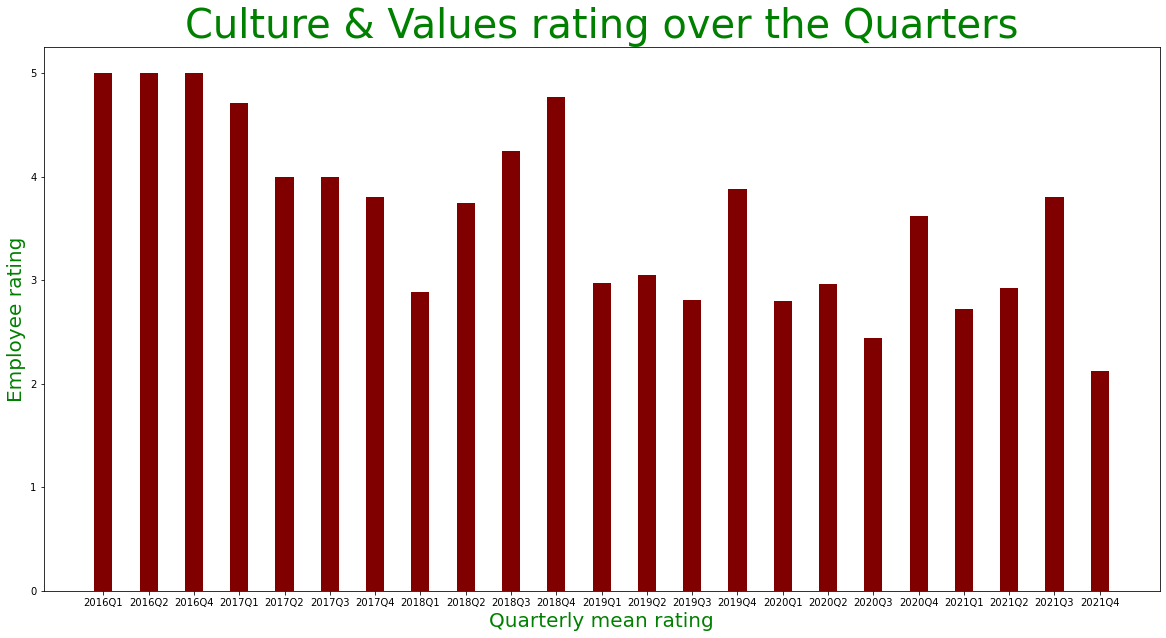

In [58]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(cultureStar_quarter_mean_dict.keys(), cultureStar_quarter_mean_dict.values(),color ='maroon',width = 0.4) 
plt.xlabel("Quarterly mean rating",fontsize = 20,color="green")
plt.ylabel("Employee rating",fontsize = 20,color="green")
plt.title(label="Culture & Values rating over the Quarters",
          fontsize=40,
          color="green")
plt.show()

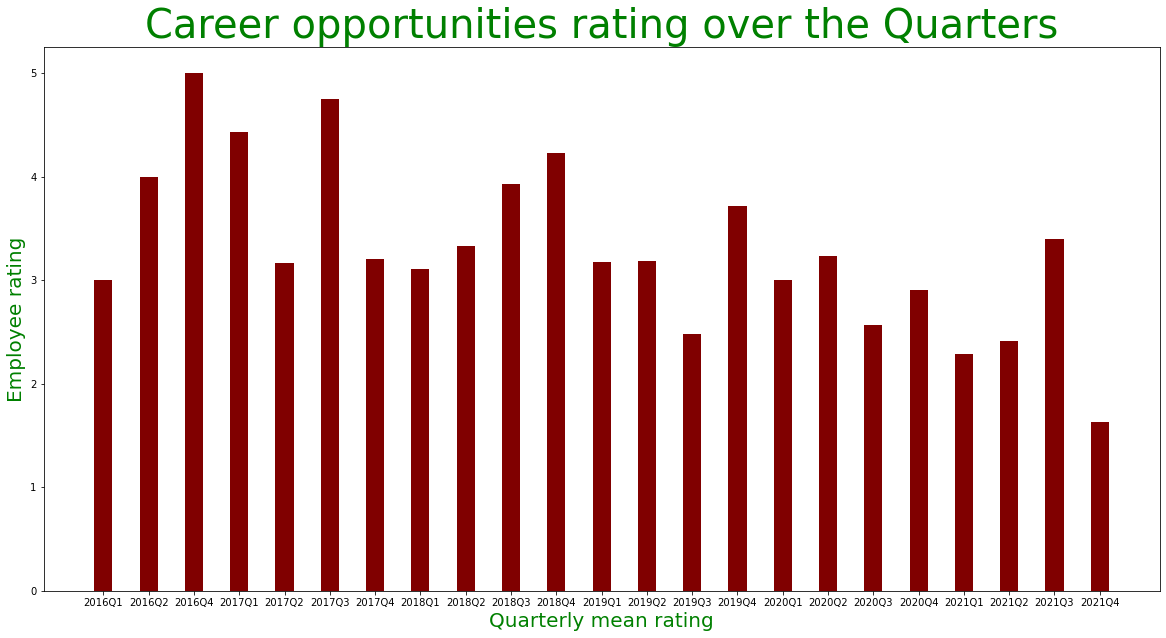

In [59]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(careerOppStar_quarter_mean_dict.keys(), careerOppStar_quarter_mean_dict.values(),color ='maroon',width = 0.4) 
plt.xlabel("Quarterly mean rating",fontsize = 20,color="green")
plt.ylabel("Employee rating",fontsize = 20,color="green")
plt.title(label="Career opportunities rating over the Quarters",
          fontsize=40,
          color="green")
plt.show()

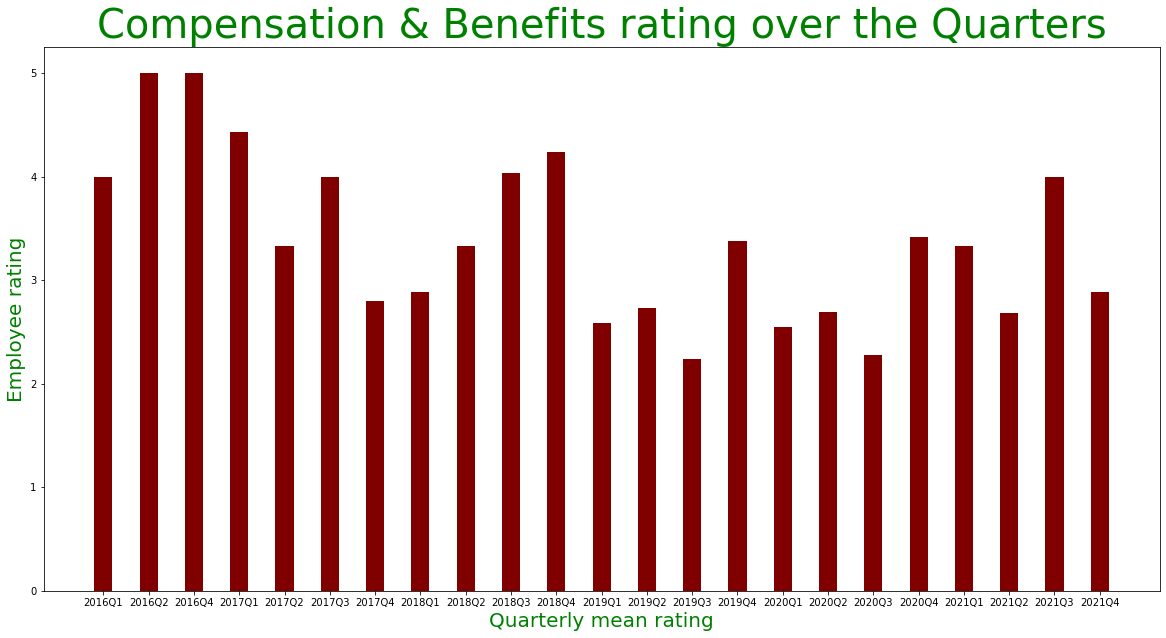

In [60]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(comBenefitsStar_quarter_mean_dict.keys(), comBenefitsStar_quarter_mean_dict.values(),color ='maroon',width = 0.4) 
plt.xlabel("Quarterly mean rating",fontsize = 20,color="green")
plt.ylabel("Employee rating",fontsize = 20,color="green")
plt.title(label="Compensation & Benefits rating over the Quarters",
          fontsize=40,
          color="green")
plt.show()

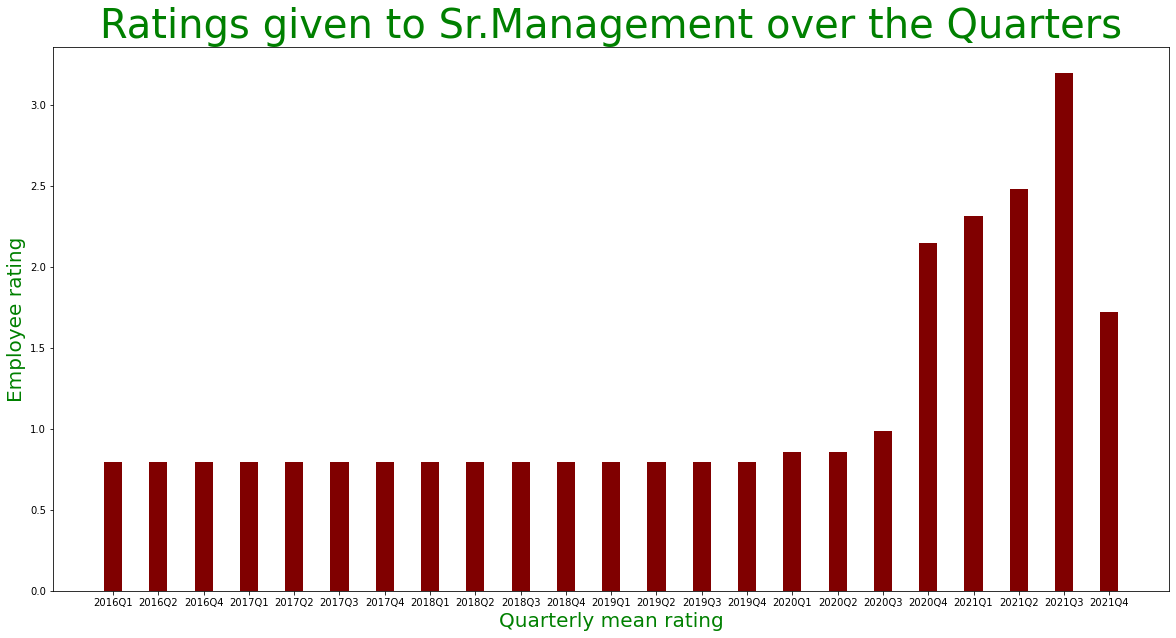

In [61]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(srManagementStar_quarter_mean_dict.keys(), srManagementStar_quarter_mean_dict.values(),color ='maroon',width = 0.4) 
plt.xlabel("Quarterly mean rating",fontsize = 20,color="green")
plt.ylabel("Employee rating",fontsize = 20,color="green")
plt.title(label="Ratings given to Sr.Management over the Quarters",
          fontsize=40,
          color="green")
plt.show()